# **COVID-19_PANDEMIC_ANALYSIS_AND_PREDICTION** 


* # **MAJOR PROJECT** (**DS-05-BS2**)



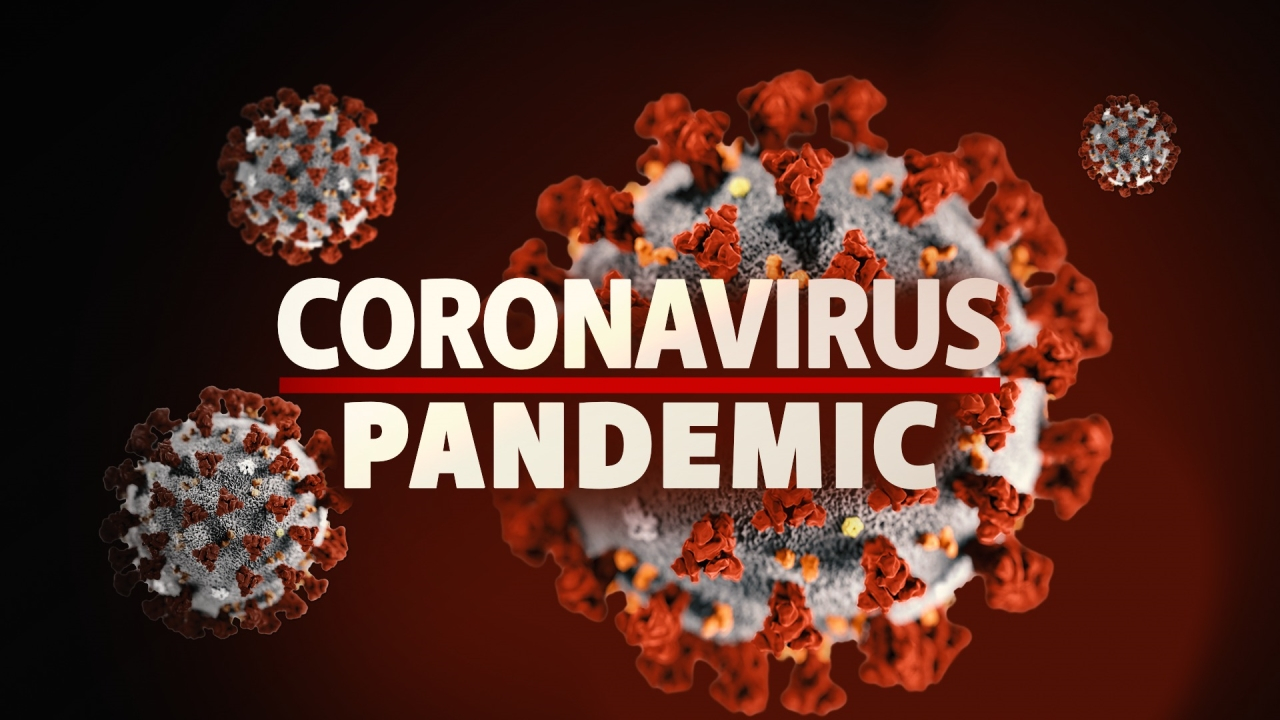

                                                      **Covid-19 Pandemic Analysis and Prediction**

**Forecasting Timeseries Data Using Facebook Fb Prophet**


1.   Installation
2.   Data Preproccessing With Time series and Location
3.   Model Fitting and Obtaining The Forecasts
4.   Plotting The Forecasts
5.   CrossValidation
6.   Computing Performance Matrics
7.   Visualize the Performance Metrics
8.   Case study Part 1              
Based On Age Group                                                                            
     A. Medium Aged Group Cases                                                                                                                                                           
     B. Age 65 Older
     
     C. Age 70 Older
9.   Case study Part 2                                                                            
     A. India                                                                                                                                                           
     B. United States 
10.   Conclusion
11.   Case study Part 3                                                                          
     A. New Cases                                                                                                                                                           
     B. New Vaccination
     
     C. New Death


---



**ON OVERALL THERE ARE 3 SECTIONS**

1.   **OVERVIEW**

    *   TOTAL_CASES
    *   TOTAL_VACCINATIONS
    *   TOTAL_DEATHS

Case Study Part I
2.   **BASED ON AGED GROUPS**

    *   MEADIAN_AGED
    *   AGED 65 OLDER
    *   AGED 70 OLDER

Case Study Part II
3.   **BASED ON COUNTRY**
    *   India
    *   United States

Case Study Part III  
    *   New Cases
    *   New Death
    *   New Vaccination



---








# 1. Installation






**CLICK HERE TO DOWNLOAD DATASET :-** [owid-covid-data.csv](https://drive.google.com/file/d/10IBVX8UHNpSWF64ZQTWaDUnAf9Wa30aO/view?usp=sharing)

(*NOTE * Upload the Dataset in colab files or running directory*)





In [ ]:
#@title
!pip install ipython-autotime
%load_ext autotime
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 842 µs (started: 2021-07-14 16:38:02 +00:00)


In [ ]:
              #  If this code give error try second
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Major Project ML/owid-covid-data.csv")
data
                             #  If code gives error then try this
                             #  data = pd.read_csv('/content/owid-covid-data.csv'
                             #  data

iso_code continent  ... human_development_index excess_mortality
0           AFG      Asia  ...                   0.511              NaN
1           AFG      Asia  ...                   0.511              NaN
2           AFG      Asia  ...                   0.511              NaN
3           AFG      Asia  ...                   0.511              NaN
4           AFG      Asia  ...                   0.511              NaN
...         ...       ...  ...                     ...              ...
100185      ZWE    Africa  ...                   0.571              NaN
100186      ZWE    Africa  ...                   0.571              NaN
100187      ZWE    Africa  ...                   0.571              NaN
100188      ZWE    Africa  ...                   0.571              NaN
100189      ZWE    Africa  ...                   0.571              NaN

[100190 rows x 60 columns]

time: 749 ms (started: 2021-07-14 16:38:05 +00:00)


In [ ]:
#If code gives error then try this
#data = pd.read_csv('/content/owid-covid-data.csv')
#data

# 2. Data Preproccessing With Time series and Location

### A. COVID-19 TOTAL CASES


---



1. Covid-19 Total Cases data with respect to location

In [ ]:
import pandas as pd
df1 = data.rename(columns={data.columns[2]:'Location',data.columns[4]:'Number of Cases'})
df_new1 = df1[['Location','Number of Cases']]
df_new1.dropna(subset = ["Number of Cases"], inplace=True)
df_new1['Number of Cases'] = df_new1['Number of Cases'].astype(int)
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96584 entries, 0 to 100189
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         96584 non-null  object
 1   Number of Cases  96584 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB
time: 64.2 ms (started: 2021-07-14 16:38:13 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



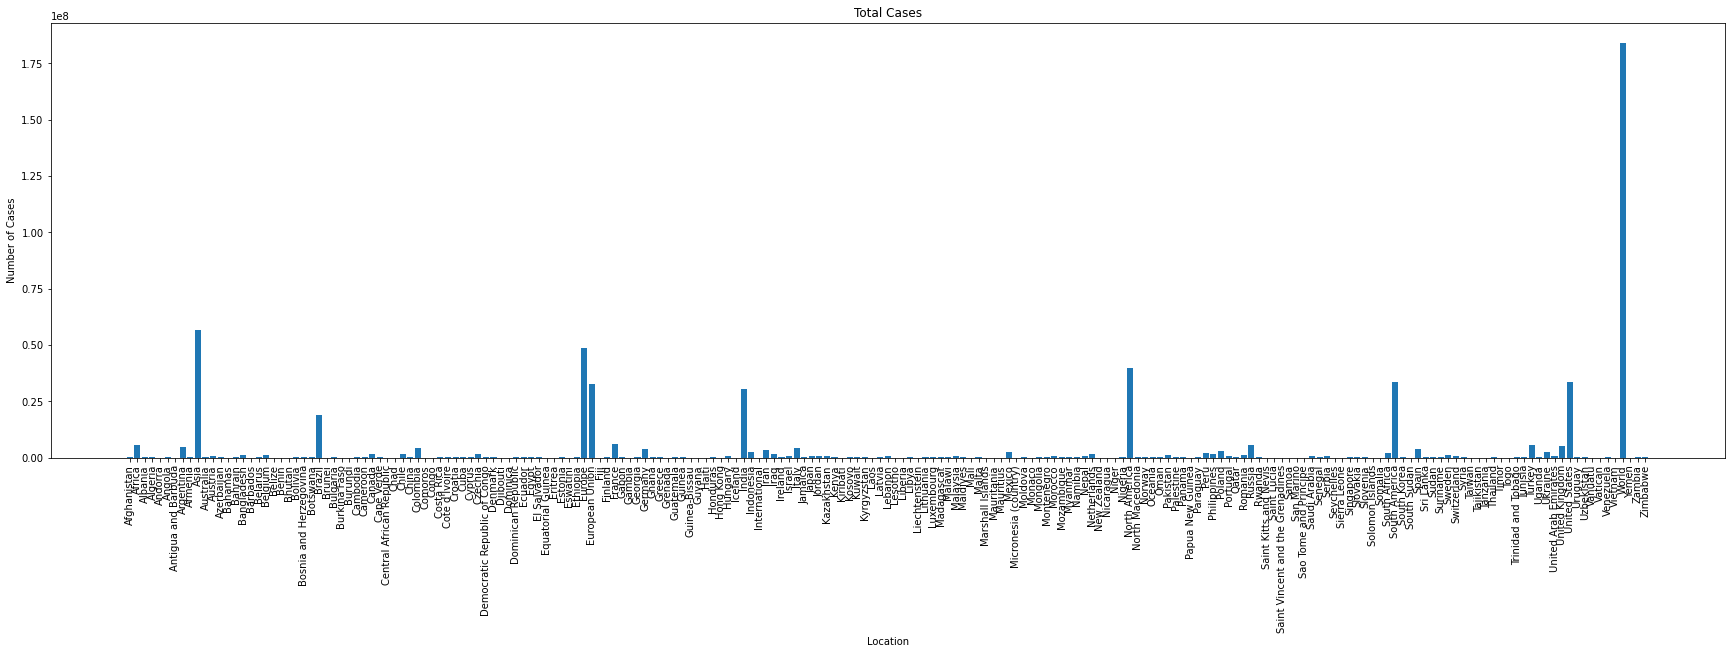

time: 2min 53s (started: 2021-07-14 16:38:18 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new1['Location'],df_new1['Number of Cases'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Location')
plt.show()

2. Covid-19 Total Cases data with respect to Time

In [ ]:
import pandas as pd
df2 = data.rename(columns={data.columns[3]:'Date',data.columns[4]:'Number of Cases'})
df_new2 = df2[['Date','Number of Cases']]
df_new2.dropna(subset = ["Number of Cases"], inplace=True)
df_new2['Date'] = pd.to_datetime(df_new2['Date'])
df_new2['Number of Cases'] = df_new2['Number of Cases'].astype(int)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96584 entries, 0 to 100189
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             96584 non-null  datetime64[ns]
 1   Number of Cases  96584 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB
time: 77.7 ms (started: 2021-07-14 16:43:25 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

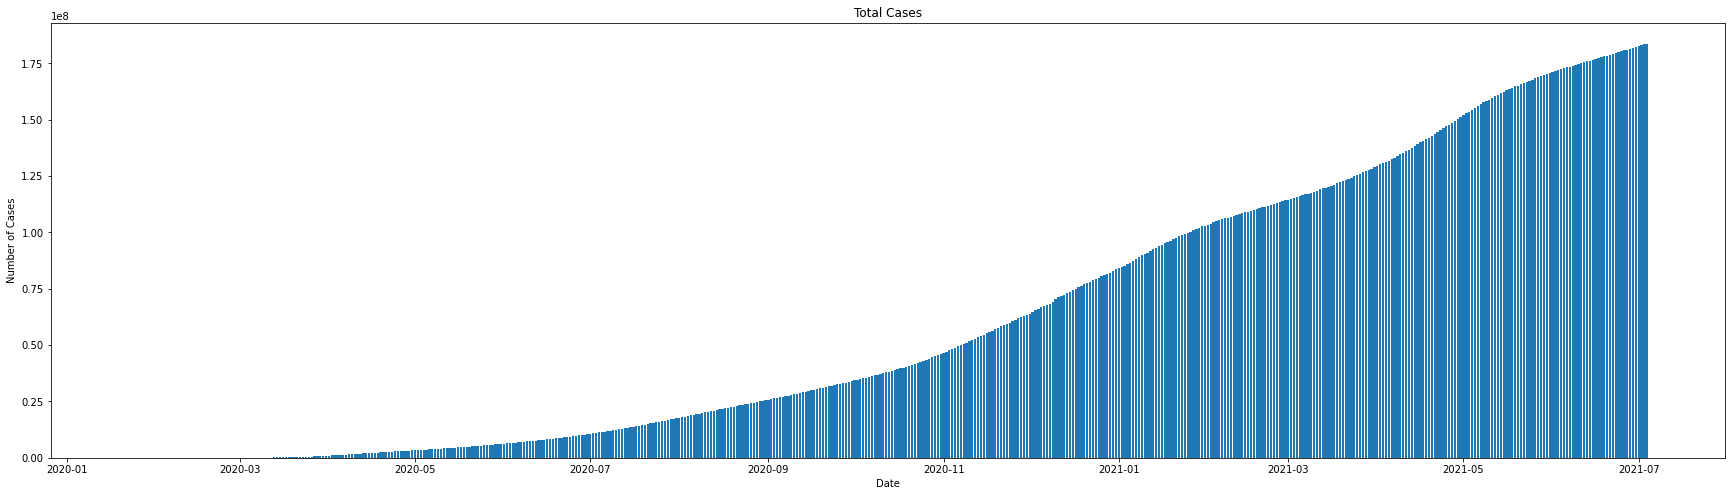

time: 3min 8s (started: 2021-07-14 12:17:57 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new2['Date'],df_new2['Number of Cases'])
plt.autoscale()
plt.title('Total Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.show()

### B. COVID-19 TOTAL DEATHS


---



1. Covid-19 Total Deaths data with respect to location

In [ ]:
import pandas as pd
df3 = data.rename(columns={data.columns[2]:'Location',data.columns[7]:'Number of Death'})
df_new3 = df3[['Location','Number of Death']]
df_new3.dropna(subset = ["Number of Death"], inplace=True)
df_new3['Number of Death'] = df_new3['Number of Death'].astype(int)
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86431 entries, 27 to 100189
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         86431 non-null  object
 1   Number of Death  86431 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB
time: 61.7 ms (started: 2021-07-14 16:43:31 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



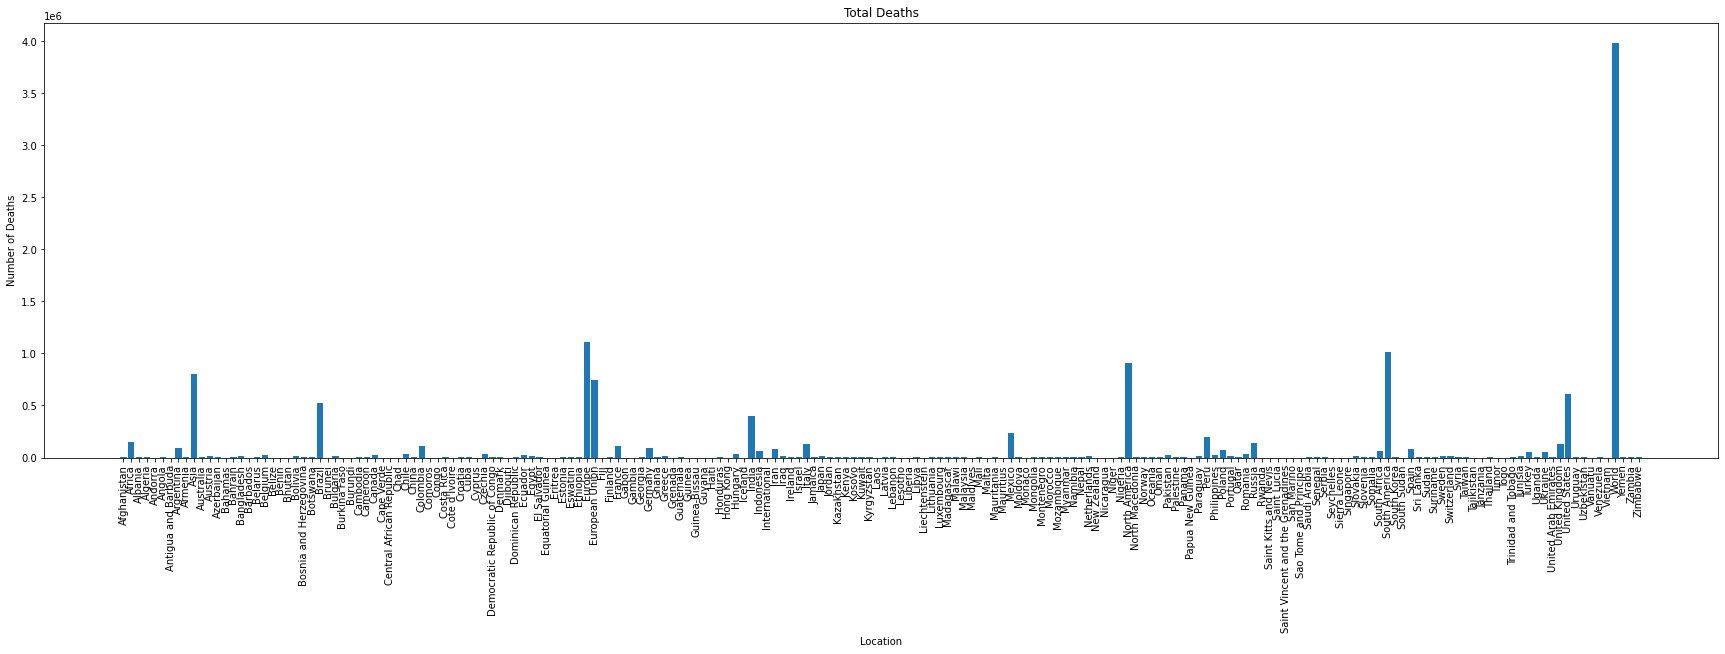

time: 2min 55s (started: 2021-07-14 12:22:16 +00:00)


In [ ]:
#Deaths With Respect To Location
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new3['Location'],df_new3['Number of Death'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('Location')
plt.show()

2. Covid-19 Total Deaths data with respect to Time

In [ ]:
import pandas as pd
df4 = data.rename(columns={data.columns[3]:'Date',data.columns[7]:'Number of Death'})
df_new4 = df4[['Date','Number of Death']]
df_new4.dropna(subset = ["Number of Death"], inplace=True)
df_new4['Date'] = pd.to_datetime(df_new4['Date'])
df_new4['Number of Death'] = df_new4['Number of Death'].astype(int)
df_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86431 entries, 27 to 100189
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             86431 non-null  datetime64[ns]
 1   Number of Death  86431 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 MB
time: 64.6 ms (started: 2021-07-14 16:43:45 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

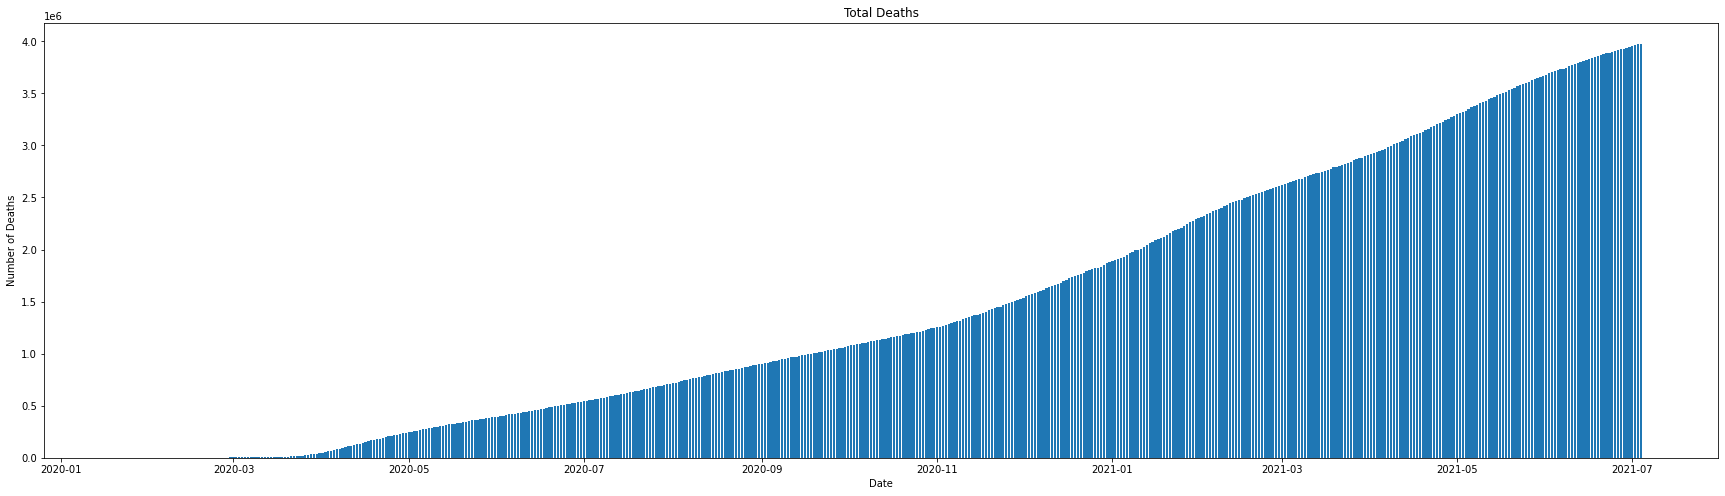

time: 2min 53s (started: 2021-07-14 12:25:37 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new4['Date'],df_new4['Number of Death'])
plt.autoscale()
plt.title('Total Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('Date')
plt.show()

### C. COVID-19 TOTAL VACCINATIONS


---



1. Covid-19 Vaccination data with respect to Location

In [ ]:
import pandas as pd
df5 = data.rename(columns={data.columns[2]:'Location',data.columns[34]:'total_vaccinations'})
df_new5 = df5[['Location','total_vaccinations']]
df_new5.dropna(subset = ["total_vaccinations"], inplace=True)
df_new5['total_vaccinations'] = df_new5['total_vaccinations'].astype(int)
df_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16876 entries, 364 to 100189
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location            16876 non-null  object
 1   total_vaccinations  16876 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 395.5+ KB
time: 53.5 ms (started: 2021-07-14 16:43:51 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



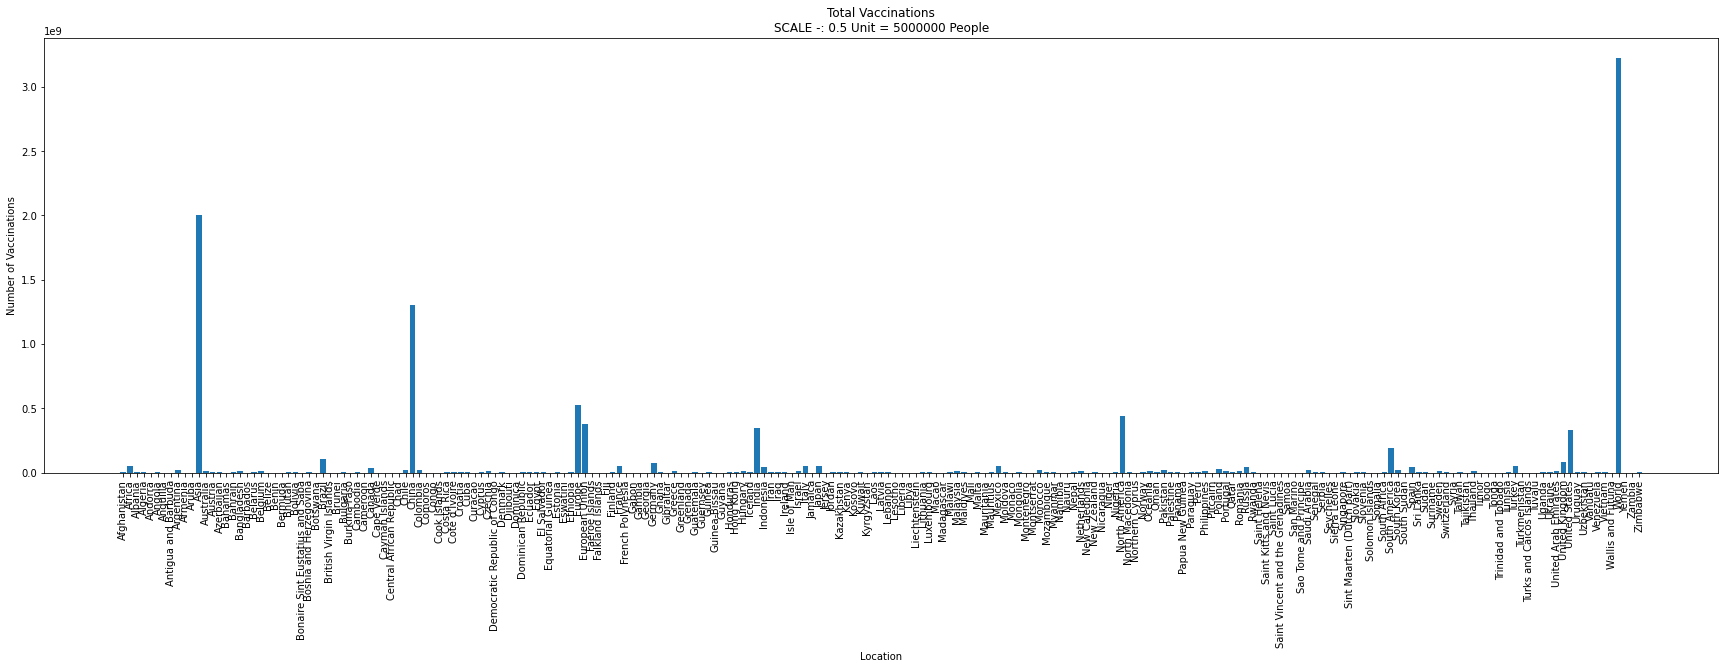

time: 43.3 s (started: 2021-07-14 12:29:04 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new5['Location'],df_new5['total_vaccinations'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Vaccinations\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Number of Vaccinations')
plt.xlabel('Location')
plt.show()

2. Covid-19 Vaccination data with respect to Time

In [ ]:
import pandas as pd
df6 = data.rename(columns={data.columns[3]:'Date',data.columns[34]:'total_vaccinations'})
df_new6 = df6[['Date','total_vaccinations']]
df_new6.dropna(subset = ["total_vaccinations"], inplace=True)
df_new6['Date'] = pd.to_datetime(df_new6['Date'])
df_new6['total_vaccinations'] = df_new6['total_vaccinations'].astype(int)
df_new6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16876 entries, 364 to 100189
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16876 non-null  datetime64[ns]
 1   total_vaccinations  16876 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 395.5 KB
time: 54.4 ms (started: 2021-07-14 16:43:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

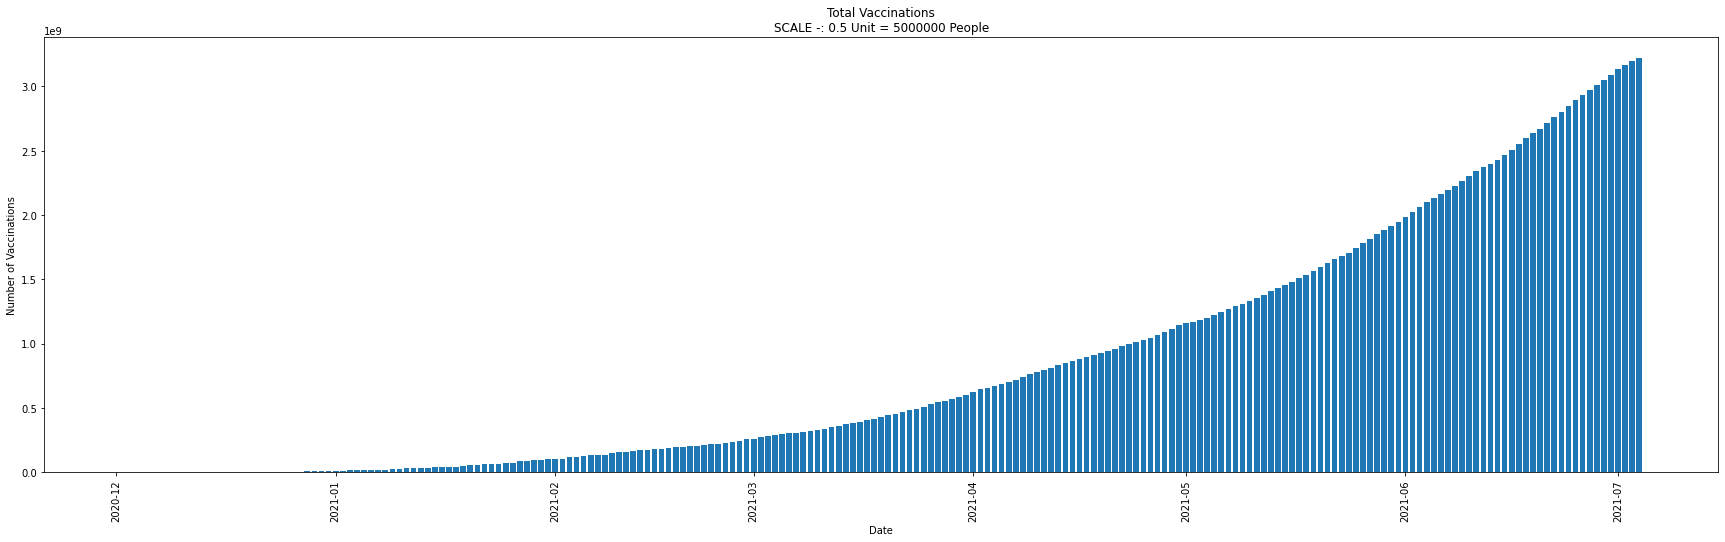

time: 33.4 s (started: 2021-07-14 12:29:54 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new6['Date'],df_new6['total_vaccinations'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Vaccinations\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Number of Vaccinations')
plt.xlabel('Date')
plt.show()

# 3. Model Fitting and Obtaining The Forecasts

**A. Total Cases of Covid-19**


---



In [ ]:
import pandas as pd
df7 = data.rename(columns={data.columns[3]:'ds',data.columns[4]:'y'})
df_new7 = df7[['ds','y']]
df_new7.dropna(subset = ["y"], inplace=True)
df_new7['ds'] = pd.to_datetime(df_new7['ds'])
df_new7['y'] = df_new7['y'].astype(int)
df_new7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds      y
0      2020-02-24      1
1      2020-02-25      1
2      2020-02-26      1
3      2020-02-27      1
4      2020-02-28      1
...           ...    ...
100185 2021-06-30  49864
100186 2021-07-01  51221
100187 2021-07-02  52663
100188 2021-07-03  53665
100189 2021-07-04  54474

[96584 rows x 2 columns]

time: 77.5 ms (started: 2021-07-14 16:44:04 +00:00)


In [ ]:
from fbprophet import Prophet
model1 = Prophet()
model1.fit(df_new7)
x1 = model1.make_future_dataframe(periods=30,freq='D')
forecast1 = model1.predict(x1)
forecast1[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.737969e+04 -9.567346e+06  9.655503e+06
1   2020-01-23 -1.606006e+04 -1.033125e+07  9.265909e+06
2   2020-01-24 -1.463519e+04 -9.163476e+06  9.787466e+06
3   2020-01-25 -1.352175e+04 -9.646286e+06  9.796494e+06
4   2020-01-26 -1.326980e+04 -1.004242e+07  9.158862e+06
..         ...           ...           ...           ...
555 2021-07-30  3.211126e+06 -5.062178e+06  1.300896e+07
556 2021-07-31  3.220665e+06 -6.334713e+06  1.157424e+07
557 2021-08-01  3.229343e+06 -6.435308e+06  1.205285e+07
558 2021-08-02  3.237378e+06 -6.054859e+06  1.274143e+07
559 2021-08-03  3.245459e+06 -5.922824e+06  1.217276e+07

[560 rows x 4 columns]

time: 17.7 s (started: 2021-07-14 16:44:14 +00:00)


**B. Total Deaths of Covid-19**


---



In [ ]:
#Forecasting For Death cases
import pandas as pd
df8 = data.rename(columns={data.columns[3]:'ds',data.columns[7]:'y'})
df_new8 = df8[['ds','y']]
df_new8.dropna(subset = ["y"], inplace=True)
df_new8['ds'] = pd.to_datetime(df_new8['ds'])
df_new8['y'] = df_new8['y'].astype(int)
df_new8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds     y
27     2020-03-22     1
28     2020-03-23     1
29     2020-03-24     1
30     2020-03-25     2
31     2020-03-26     3
...           ...   ...
100185 2021-06-30  1789
100186 2021-07-01  1808
100187 2021-07-02  1841
100188 2021-07-03  1859
100189 2021-07-04  1878

[86431 rows x 2 columns]

time: 64.7 ms (started: 2021-07-14 16:44:36 +00:00)


In [ ]:
from fbprophet import Prophet
model2 = Prophet()
model2.fit(df_new8)
x2 = model2.make_future_dataframe(periods=30,freq='D')
forecast2 = model2.predict(x2)
forecast2[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat     yhat_lower     yhat_upper
0   2020-01-22  -1267.926509 -229684.292803  220720.872527
1   2020-01-23  -1205.107322 -216317.528995  213101.498714
2   2020-01-24  -1138.603684 -221274.631707  221533.662655
3   2020-01-25  -1094.109524 -223956.994798  215110.671331
4   2020-01-26  -1108.402167 -220411.974235  214096.837693
..         ...           ...            ...            ...
555 2021-07-30  71131.695455 -132310.477241  303619.046937
556 2021-07-31  71309.015388 -144973.473479  284050.456621
557 2021-08-01  71427.548518 -152199.928296  266953.201403
558 2021-08-02  71621.355886 -165663.870465  300252.990119
559 2021-08-03  71796.447377 -140735.001411  291524.632596

[560 rows x 4 columns]

time: 7.58 s (started: 2021-07-14 16:44:55 +00:00)


**C. Total Vaccinations of Covid-19**


---



In [ ]:
#Forecasting For Covid cases
import pandas as pd
df9 = data.rename(columns={data.columns[3]:'ds',data.columns[34]:'y'})
df_new9 = df9[['ds','y']]
df_new9.dropna(subset = ["y"], inplace=True)
df_new9['ds'] = pd.to_datetime(df_new9['ds'])
df_new9['y'] = df_new9['y'].astype(int)
df_new9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds        y
364    2021-02-22        0
370    2021-02-28     8200
386    2021-03-16    54000
408    2021-04-07   120000
423    2021-04-22   240000
...           ...      ...
100185 2021-06-30  1332438
100186 2021-07-01  1341960
100187 2021-07-02  1352718
100188 2021-07-03  1359587
100189 2021-07-04  1361210

[16876 rows x 2 columns]

time: 54 ms (started: 2021-07-14 16:44:44 +00:00)


In [ ]:
from fbprophet import Prophet
model3 = Prophet()
model3.fit(df_new9)
x3 = model3.make_future_dataframe(periods=30,freq='D')
forecast3 = model3.predict(x3)
forecast3[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-12-02 -6.123372e+06 -2.324686e+08  2.209590e+08
1   2020-12-03 -4.432345e+06 -2.232056e+08  2.035771e+08
2   2020-12-04 -3.869581e+06 -2.060993e+08  2.251224e+08
3   2020-12-05  3.610437e+05 -2.259902e+08  2.098578e+08
4   2020-12-06 -7.638256e+05 -2.237281e+08  2.315893e+08
..         ...           ...           ...           ...
240 2021-07-30  1.253510e+08 -8.813317e+07  3.496832e+08
241 2021-07-31  1.306823e+08 -1.000708e+08  3.514879e+08
242 2021-08-01  1.306582e+08 -7.689139e+07  3.642567e+08
243 2021-08-02  1.265783e+08 -9.616900e+07  3.471642e+08
244 2021-08-03  1.271088e+08 -8.764889e+07  3.504539e+08

[245 rows x 4 columns]

time: 4.12 s (started: 2021-07-14 16:46:41 +00:00)


# 4. Plotting The Forecasts

**A. Plotting the Forecasts for Total Cases of Covid-19**


---



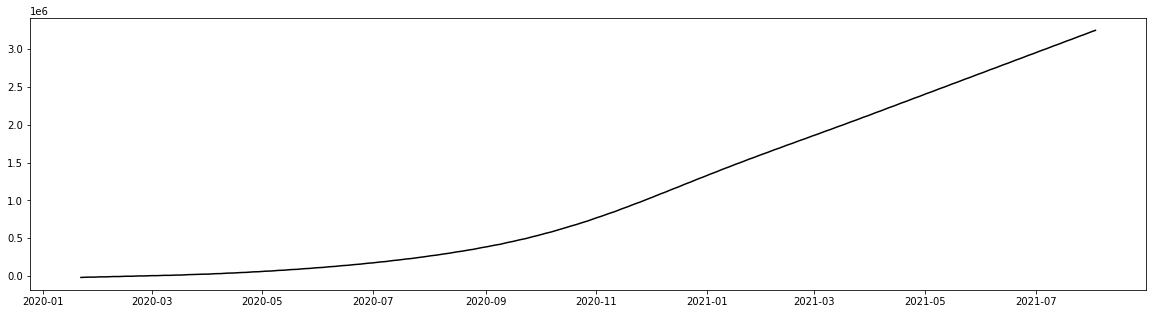

time: 259 ms (started: 2021-07-14 16:46:52 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast1['ds'],forecast1['yhat'],c='k')

**B. Plotting the Forecasts for Total Deaths due to Covid-19**


---



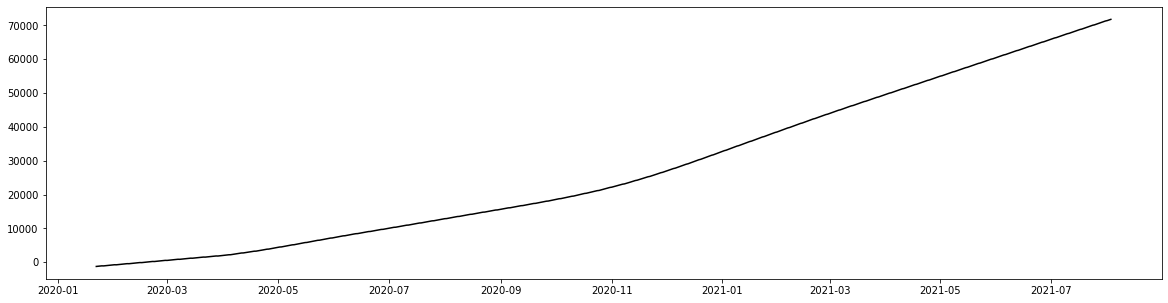

time: 269 ms (started: 2021-07-14 12:32:53 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast2['ds'],forecast2['yhat'],c='k')

**C. Plotting the Forecasts for Total Vaccination of Covid-19**


---



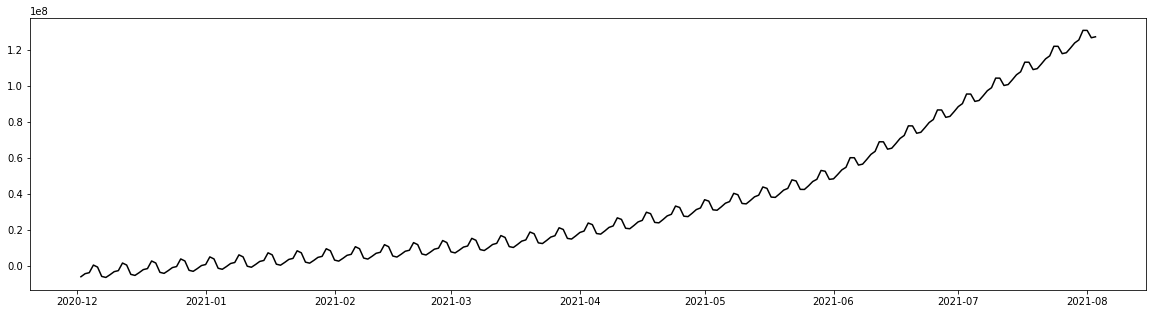

time: 244 ms (started: 2021-07-14 12:33:14 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast3['ds'],forecast3['yhat'],c='k')

# 5. Cross Validation

**I. Cross Validation for Total cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv1 = cross_validation(model1,horizon="30 days",period='15 days')

INFO:fbprophet:Making 28 forecasts with cutoffs between 2020-04-25 00:00:00 and 2021-06-04 00:00:00



time: 4min 13s (started: 2021-07-14 12:33:44 +00:00)


**II. Cross Validation for Total Death cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv2 = cross_validation(model2,horizon="30 days",period='15 days')

INFO:fbprophet:Making 28 forecasts with cutoffs between 2020-04-25 00:00:00 and 2021-06-04 00:00:00



time: 4min 34s (started: 2021-07-14 12:38:28 +00:00)


**III. Cross Validation for Total Vaccination of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv3 = cross_validation(model3,horizon="30 days",period='15 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2021-03-06 00:00:00 and 2021-06-04 00:00:00



time: 38.5 s (started: 2021-07-14 12:43:35 +00:00)


#   6. Computing Performance Matrics

**I. Performance Matrics for Total cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance1 = performance_metrics(df_cv1)
df_performance1.head()

horizon           mse          rmse  ...          mape      mdape  coverage
0  4 days  5.172838e+13  7.192244e+06  ...  11648.527721  31.775766  0.955440
1  5 days  5.221231e+13  7.225809e+06  ...  11755.732668  31.666823  0.955272
2  6 days  5.269550e+13  7.259166e+06  ...  11854.916774  31.705387  0.955165
3  7 days  5.318106e+13  7.292534e+06  ...  11908.566874  31.613192  0.955175
4  8 days  5.368317e+13  7.326880e+06  ...  11941.706131  31.437909  0.955178

[5 rows x 7 columns]

time: 707 ms (started: 2021-07-14 12:45:19 +00:00)


**II. Performance Matrics for Total Death cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance2 = performance_metrics(df_cv2)
df_performance2.head()

horizon           mse           rmse  ...        mape      mdape  coverage
0  4 days  2.810022e+10  167631.209604  ...  939.411740  51.309674  0.953552
1  5 days  2.832182e+10  168290.873999  ...  947.052682  51.307007  0.953325
2  6 days  2.854804e+10  168961.640885  ...  954.784327  51.258977  0.953031
3  7 days  2.877894e+10  169643.575857  ...  957.565579  50.870407  0.952933
4  8 days  2.902086e+10  170355.091218  ...  956.516042  51.117603  0.952632

[5 rows x 7 columns]

time: 505 ms (started: 2021-07-14 12:45:57 +00:00)


**III. Performance Matrics for Total Vaccination of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance3 = performance_metrics(df_cv3)
df_performance3.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon           mse          rmse           mae      mdape  coverage
0  4 days  2.138451e+16  1.462344e+08  4.979220e+07  22.570551  0.929874
1  5 days  2.228053e+16  1.492667e+08  5.079190e+07  21.380972  0.929090
2  6 days  2.296963e+16  1.515574e+08  5.175912e+07  23.176069  0.928897
3  7 days  2.386108e+16  1.544703e+08  5.250198e+07  23.614560  0.928453
4  8 days  2.478157e+16  1.574216e+08  5.318615e+07  23.563640  0.927871

time: 169 ms (started: 2021-07-14 12:46:04 +00:00)


# 7. Visualize the Performance Metrics

**I. Performance Matrics of Total cases of Covid-19**


---



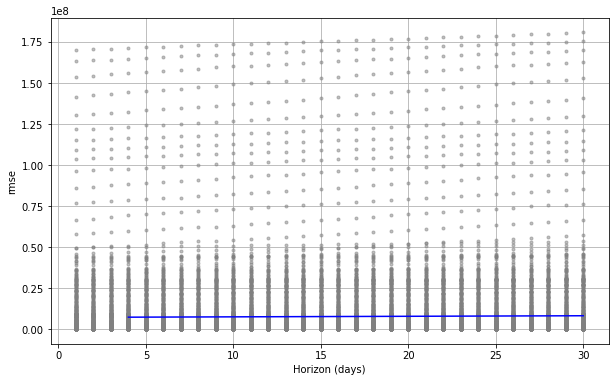

time: 1.97 s (started: 2021-07-14 12:46:18 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv1,metric='rmse')

**II. Performance Matrics for Total Death cases of Covid-19**


---



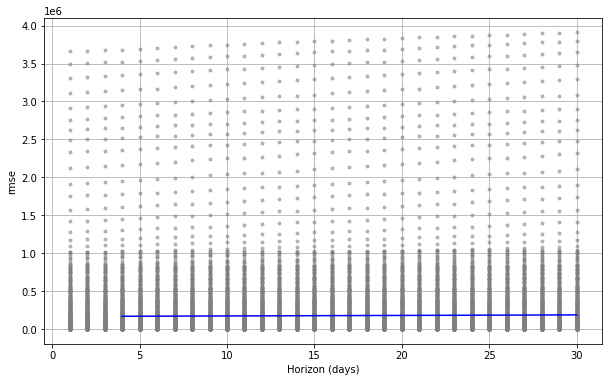

time: 1.71 s (started: 2021-07-14 12:46:30 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(df_cv2,metric='rmse')

**III. Performance Matrics for Total Vaccination of Covid-19**

---



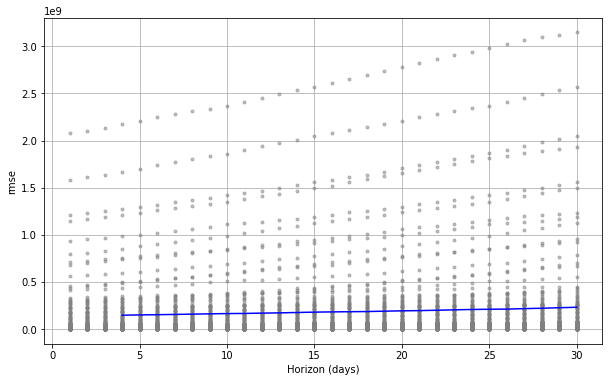

time: 473 ms (started: 2021-07-14 12:46:43 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv3,metric='rmse')

# 8.Case Study Part I

# BASES ON AGE GROUP

## Medium Aged

**CREATING DATASET OF LOCATION AND MEDIAN AGE**

In [ ]:
import pandas as pd
df_ma1 = data.rename(columns={data.columns[2]:'Location',data.columns[46]:'median_age'})
df_new_ma1 = df_ma1[['Location','median_age']]
df_new_ma1.dropna(subset = ["median_age"], inplace=True)
df_new_ma1['median_age'] = df_new_ma1['median_age'].astype(int)

time: 30.8 ms (started: 2021-07-14 12:47:02 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#CREATING DATASET OF DATES AND MEDIAN AGE
df_ma2 = data.rename(columns={data.columns[3]:'Date',data.columns[46]:'median_age'})
df_new_ma2 = df_ma2[['Date','median_age']]
df_new_ma2.dropna(subset = ["median_age"], inplace=True)
df_new_ma2['Date'] = pd.to_datetime(df_new_ma2['Date'])
df_new_ma2['median_age'] = df_new_ma2['median_age'].astype(int)

time: 43.8 ms (started: 2021-07-14 12:47:09 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

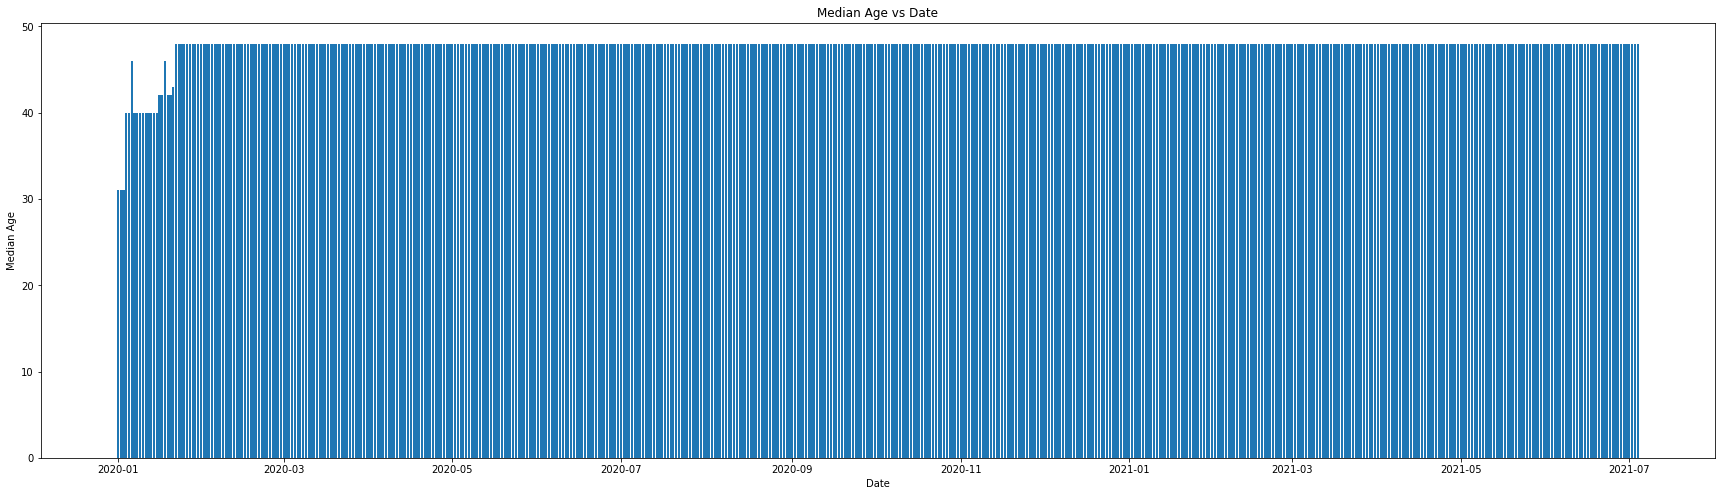

time: 2min 52s (started: 2021-07-14 12:47:15 +00:00)


In [ ]:
#PLOTTING MEDIAN AGE VS DATES
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new_ma2['Date'],df_new_ma2['median_age'])
plt.autoscale()
plt.title('Median Age vs Date')
plt.ylabel('Median Age')
plt.xlabel('Date')
plt.show()

In [ ]:
#CREATING DATASET FOR FORECATING FOR MEDIAN AGE
import pandas as pd
df_ma3 = data.rename(columns={data.columns[3]:'ds',data.columns[46]:'y'})
df_new_ma3 = df_ma3[['ds','y']]
df_new_ma3.dropna(subset = ["y"], inplace=True)
df_new_ma3['ds'] = pd.to_datetime(df_new_ma3['ds'])
df_new_ma3['y'] = df_new_ma3['y'].astype(int)
df_new_ma3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds   y
0      2020-02-24  18
1      2020-02-25  18
2      2020-02-26  18
3      2020-02-27  18
4      2020-02-28  18
...           ...  ..
100185 2021-06-30  19
100186 2021-07-01  19
100187 2021-07-02  19
100188 2021-07-03  19
100189 2021-07-04  19

[89535 rows x 2 columns]

time: 58.8 ms (started: 2021-07-14 12:50:48 +00:00)


In [ ]:
#FORECATING FOR MEDIAN AGE
from fbprophet import Prophet
model_ma = Prophet()
model_ma.fit(df_new_ma3)
x_ma = model_ma.make_future_dataframe(periods=30,freq='D')
forecast_ma = model_ma.predict(x_ma)
forecast_ma[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
0   2020-01-01  40.334255   28.582676   52.586040
1   2020-01-02  40.230986   28.120619   50.907898
2   2020-01-03  40.121222   28.848897   51.732731
3   2020-01-04  40.017587   28.127372   50.648242
4   2020-01-05  39.916093   27.800234   51.287402
..         ...        ...         ...         ...
576 2021-07-30  29.951376   18.796693   41.907516
577 2021-07-31  29.953582   18.769646   41.879706
578 2021-08-01  29.957931   18.467999   41.423514
579 2021-08-02  29.952232   18.299186   41.741131
580 2021-08-03  29.956095   18.949977   40.912244

[581 rows x 4 columns]

time: 54.6 s (started: 2021-07-14 12:51:01 +00:00)


In [ ]:
#CROSS VALIDATIONS
from fbprophet.diagnostics import cross_validation
df_cv_ma=cross_validation(model_ma,horizon="30 days",period='15 days')

INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-04-10 00:00:00 and 2021-06-04 00:00:00



time: 9min 42s (started: 2021-07-14 12:52:33 +00:00)


In [ ]:
#PERFORMANCE MATRIX
from fbprophet.diagnostics import performance_metrics
df_performance_ma=performance_metrics(df_cv_ma)
df_performance_ma.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  83.174886  9.120027  7.836781  0.298273  0.269754  0.717895
1  5 days  83.174267  9.119993  7.836946  0.298260  0.269754  0.717799
2  6 days  83.173482  9.119950  7.837114  0.298254  0.269754  0.717888
3  7 days  83.176046  9.120090  7.837245  0.298245  0.269788  0.718578
4  8 days  83.185916  9.120631  7.837583  0.298193  0.269788  0.719363

time: 500 ms (started: 2021-07-14 13:02:16 +00:00)


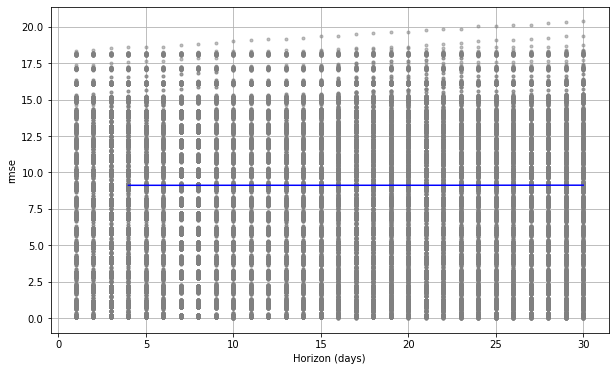

time: 1.76 s (started: 2021-07-14 13:02:23 +00:00)


In [ ]:
#CROSS VALIDATION MATRIX
from fbprophet.plot import plot_cross_validation_metric
fig_ma = plot_cross_validation_metric(df_cv_ma,metric='rmse')

## Age 65 Older

**CREATING DATASET OF LOCATION AND AGED 65 OLDER**

In [ ]:
import pandas as pd
df_a65_1 = data.rename(columns={data.columns[2]:'Location',data.columns[47]:'aged_65_older'})
df_new_a65_1 = df_a65_1[['Location','aged_65_older']]
df_new_a65_1.dropna(subset = ["aged_65_older"], inplace=True)
df_new_a65_1['aged_65_older'] = df_new_a65_1['aged_65_older'].astype(int)
df_new_a65_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Location  aged_65_older
0       Afghanistan              2
1       Afghanistan              2
2       Afghanistan              2
3       Afghanistan              2
4       Afghanistan              2
...             ...            ...
100185     Zimbabwe              2
100186     Zimbabwe              2
100187     Zimbabwe              2
100188     Zimbabwe              2
100189     Zimbabwe              2

[88529 rows x 2 columns]

time: 52.8 ms (started: 2021-07-14 13:02:17 +00:00)


**CREATING DATASET OF DATES AND AGED 65 OLDER**

In [ ]:
df_a65_2 = data.rename(columns={data.columns[3]:'Date',data.columns[47]:'aged_65_older'})
df_new_a65_2 = df_a65_2[['Date','aged_65_older']]
df_new_a65_2.dropna(subset = ["aged_65_older"], inplace=True)
df_new_a65_2['Date'] = pd.to_datetime(df_new_a65_2['Date'])
df_new_a65_2['aged_65_older'] = df_new_a65_2['aged_65_older'].astype(int)
df_new_a65_2['aged_65_older']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

0         2
1         2
2         2
3         2
4         2
         ..
100185    2
100186    2
100187    2
100188    2
100189    2
Name: aged_65_older, Length: 88529, dtype: int64

time: 51.1 ms (started: 2021-07-14 13:02:39 +00:00)


**PLOTTING AGED 65 OLDER VS LOCATIONS**

**CREATING DATASET FOR FORECATING  AGED 65 OLDER**

In [ ]:
import pandas as pd
df_a65_3 = data.rename(columns={data.columns[3]:'ds',data.columns[47]:'y'})
df_new_a65_3 = df_a65_3[['ds','y']]
df_new_a65_3.dropna(subset = ["y"], inplace=True)
df_new_a65_3['ds'] = pd.to_datetime(df_new_a65_3['ds'])
df_new_a65_3['y'] = df_new_a65_3['y'].astype(int)
df_new_a65_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds  y
0      2020-02-24  2
1      2020-02-25  2
2      2020-02-26  2
3      2020-02-27  2
4      2020-02-28  2
...           ... ..
100185 2021-06-30  2
100186 2021-07-01  2
100187 2021-07-02  2
100188 2021-07-03  2
100189 2021-07-04  2

[88529 rows x 2 columns]

time: 62 ms (started: 2021-07-14 13:06:22 +00:00)


**FORECATING FOR AGED 65 OLDER**

In [ ]:
from fbprophet import Prophet
model_65 = Prophet()
model_65.fit(df_new_a65_3)
x_65 = model_65.make_future_dataframe(periods=30,freq='D')
forecast_65 = model_65.predict(x_65)
forecast_65[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
0   2020-01-01  14.444807    6.619182   22.188086
1   2020-01-02  14.382497    6.226411   22.892533
2   2020-01-03  14.318081    5.808341   22.349724
3   2020-01-04  14.256051    6.829534   22.793198
4   2020-01-05  14.196736    6.408245   21.764560
..         ...        ...         ...         ...
576 2021-07-30   8.144309    0.739383   16.232302
577 2021-07-31   8.145870    0.509793   15.897160
578 2021-08-01   8.150146    0.166892   15.760574
579 2021-08-02   8.142626   -0.173323   16.461059
580 2021-08-03   8.143893    0.524105   15.959611

[581 rows x 4 columns]

time: 39.6 s (started: 2021-07-14 13:11:55 +00:00)


**CROSS VALIDATIONS**

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_65=cross_validation(model_65,horizon="30 days",period='15 days')

INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-04-10 00:00:00 and 2021-06-04 00:00:00



time: 9min 22s (started: 2021-07-14 13:15:41 +00:00)


**PERFORMANCE MATRIX**

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance_65=performance_metrics(df_cv_65)
df_performance_65.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  38.077237  6.170676  5.283260  1.142502  0.612484  0.841324
1  5 days  38.072842  6.170319  5.282331  1.142153  0.612537  0.842019
2  6 days  38.068676  6.169982  5.281665  1.142003  0.612455  0.841562
3  7 days  38.068501  6.169968  5.281305  1.141891  0.612488  0.841719
4  8 days  38.071488  6.170210  5.280759  1.141282  0.612488  0.841358

time: 1.73 s (started: 2021-07-14 13:26:34 +00:00)


**CROSS VALIDATION MATRIX**

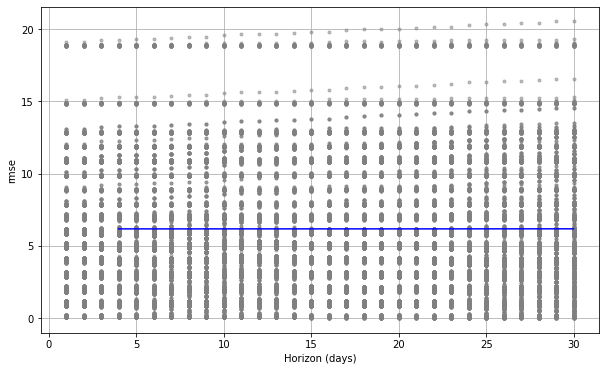

time: 1.79 s (started: 2021-07-14 13:26:47 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig_65 = plot_cross_validation_metric(df_cv_65,metric='rmse')

## Age 70 Older

**CREATING DATASET OF LOCATION AND AGED 70 OLDER**

In [ ]:
#CREATING DATASET OF LOCATION AND AGED 65 OLDER
df_a70_1 = data.rename(columns={data.columns[2]:'Location',data.columns[48]:'aged_70_older'})
df_new_a70_1 = df_a65_1[['Location','aged_70_older']]
df_new_a70_1.dropna(subset = ["aged_70_older"], inplace=True)
df_new_a70_1['aged_70_older'] = df_new_a70_1['aged_70_older'].astype(int)
df_new_a70_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Location  aged_70_older
0       Afghanistan              1
1       Afghanistan              1
2       Afghanistan              1
3       Afghanistan              1
4       Afghanistan              1
...             ...            ...
100185     Zimbabwe              1
100186     Zimbabwe              1
100187     Zimbabwe              1
100188     Zimbabwe              1
100189     Zimbabwe              1

[89040 rows x 2 columns]

time: 50.3 ms (started: 2021-07-14 13:26:55 +00:00)


**CREATING DATASET OF DATES AND AGED 70 OLDER**

In [ ]:
df_a70_2 = data.rename(columns={data.columns[3]:'Date',data.columns[48]:'aged_70_older'})
df_new_a70_2 = df_a70_2[['Date','aged_70_older']]
df_new_a70_2.dropna(subset = ["aged_70_older"], inplace=True)
df_new_a70_2['Date'] = pd.to_datetime(df_new_a70_2['Date'])
df_new_a70_2['aged_70_older'] = df_new_a70_2['aged_70_older'].astype(int)
df_new_a70_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Date  aged_70_older
0      2020-02-24              1
1      2020-02-25              1
2      2020-02-26              1
3      2020-02-27              1
4      2020-02-28              1
...           ...            ...
100185 2021-06-30              1
100186 2021-07-01              1
100187 2021-07-02              1
100188 2021-07-03              1
100189 2021-07-04              1

[89040 rows x 2 columns]

time: 60.1 ms (started: 2021-07-14 13:27:16 +00:00)


**CREATING DATASET FOR FORECATING FOR AGED 70 OLDER**

In [ ]:
import pandas as pd
df_a70_3 = data.rename(columns={data.columns[3]:'ds',data.columns[47]:'y'})
df_new_a70_3 = df_a70_3[['ds','y']]
df_new_a70_3.dropna(subset = ["y"], inplace=True)
df_new_a70_3['ds'] = pd.to_datetime(df_new_a70_3['ds'])
df_new_a70_3['y'] = df_new_a70_3['y'].astype(int)
df_new_a70_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds  y
0      2020-02-24  2
1      2020-02-25  2
2      2020-02-26  2
3      2020-02-27  2
4      2020-02-28  2
...           ... ..
100185 2021-06-30  2
100186 2021-07-01  2
100187 2021-07-02  2
100188 2021-07-03  2
100189 2021-07-04  2

[88529 rows x 2 columns]

time: 66.4 ms (started: 2021-07-14 13:35:32 +00:00)


**FORECATING FOR AGED 70 OLDER**

In [ ]:
from fbprophet import Prophet
model_70 = Prophet()
model_70.fit(df_new_a70_3)
x_70 = model_70.make_future_dataframe(periods=30,freq='D')
forecast_70 = model_70.predict(x_70)
forecast_70[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
0   2020-01-01  9.106252    0.625096   16.466940
1   2020-01-02  9.145770    1.054940   16.881152
2   2020-01-03  9.166812    0.785314   17.236079
3   2020-01-04  9.104603    1.768084   17.155513
4   2020-01-05  9.085340    1.337118   17.204854
..         ...       ...         ...         ...
576 2022-01-01  8.091289   -0.203404   16.026177
577 2022-01-02  8.075868   -0.353534   16.644734
578 2022-01-03  8.106598   -0.297996   16.135340
579 2022-01-04  8.083703   -0.093874   16.134502
580 2022-01-05  8.080555   -0.738395   15.942321

[581 rows x 4 columns]

time: 35 s (started: 2021-07-13 19:17:54 +00:00)


**PLOT FOR FORECASTING FOR TOTAL AGED 70 OLDER**

In [ ]:
#PLOT FOR FORECASTING FOR TOTAL AGED 70 OLDER 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast_70['ds'],forecast_70['yhat'],c='red')

NameError: ignored

<Figure size 1440x360 with 0 Axes>

time: 29.7 ms (started: 2021-07-14 13:35:41 +00:00)


**CROSS VALIDATIONS**

In [ ]:
#CROSS VALIDATIONS
from fbprophet.diagnostics import cross_validation
df_cv_70=cross_validation(model_70,horizon="30 days",period='15 days')

INFO:fbprophet:Making 40 forecasts with cutoffs between 2020-03-31 00:00:00 and 2021-11-06 00:00:00



time: 12min 5s (started: 2021-07-13 19:18:30 +00:00)


**PERFORMANCE MATRIX**

In [ ]:
#PERFORMANCE MATRIX
from fbprophet.diagnostics import performance_metrics
df_performance_70=performance_metrics(df_cv_70)
df_performance_70.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  38.889907  6.236177  5.363190  1.146937  0.606179  0.839847
1  5 days  38.983731  6.243695  5.362801  1.139843  0.602411  0.838182
2  6 days  38.989822  6.244183  5.360289  1.137512  0.596794  0.838095
3  7 days  38.921845  6.238737  5.356358  1.139989  0.604022  0.838152
4  8 days  38.673390  6.218793  5.342999  1.146462  0.608548  0.840304

time: 526 ms (started: 2021-07-13 19:30:36 +00:00)


**CROSS VALIDATION MATRIX**

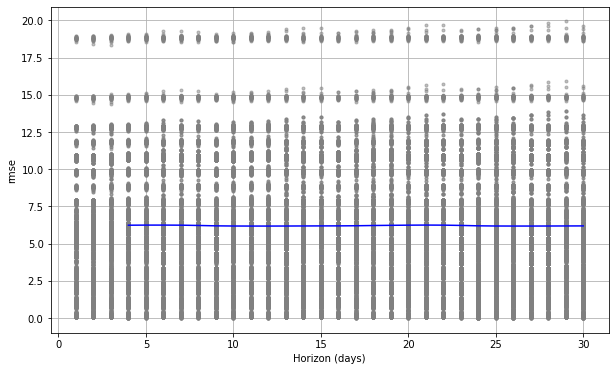

time: 1.73 s (started: 2021-07-13 19:30:36 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig_70 = plot_cross_validation_metric(df_cv_70,metric='rmse')

# 9. Case study Part II

#   BASED ON COUNTRY

## A. India

**Total Covid 19 Cases in India**


---



I. Data Preproccessing With Time series

In [ ]:
df_cases = data.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
41447  2020-01-30  1.0
41448  2020-01-31  1.0
41449  2020-02-01  1.0
41450  2020-02-02  2.0
41451  2020-02-03  3.0

time: 28.7 ms (started: 2021-07-14 13:36:16 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model4 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model4.fit(df_cases)
future = model4.make_future_dataframe(periods=30)
future
forecast4 = model4.predict(future)
forecast4[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-30 -2.659573e+03 -4.352645e+05  4.374807e+05
1   2020-01-31 -3.454788e+02 -4.302129e+05  4.548066e+05
2   2020-02-01 -1.129881e+03 -4.562227e+05  4.473667e+05
3   2020-02-02 -4.943195e+03 -4.542609e+05  4.476026e+05
4   2020-02-03  1.518886e+03 -4.639703e+05  4.558430e+05
..         ...           ...           ...           ...
547 2021-07-30  3.504724e+07  3.277230e+07  3.719143e+07
548 2021-07-31  3.517483e+07  3.282603e+07  3.751345e+07
549 2021-08-01  3.529938e+07  3.281231e+07  3.765979e+07
550 2021-08-02  3.543421e+07  3.274663e+07  3.791736e+07
551 2021-08-03  3.555742e+07  3.261793e+07  3.807421e+07

[552 rows x 4 columns]

time: 6.67 s (started: 2021-07-14 13:37:32 +00:00)


III. Plotting The Forecasts

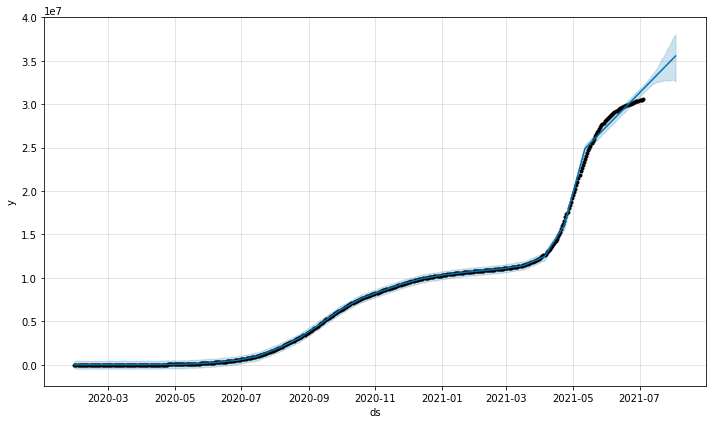

time: 648 ms (started: 2021-07-14 13:37:38 +00:00)


In [ ]:
model4.plot(forecast4);

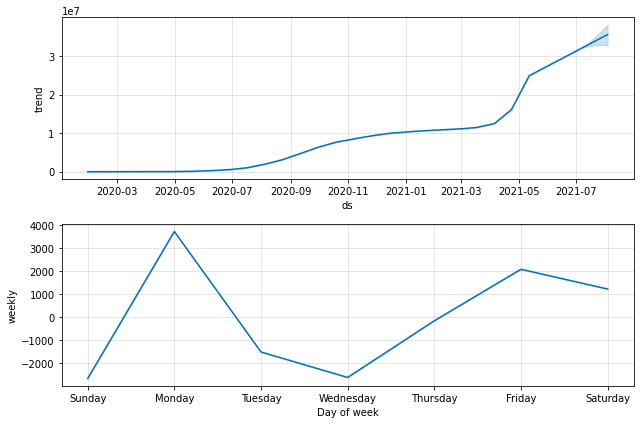

time: 590 ms (started: 2021-07-14 13:38:19 +00:00)


In [ ]:
model4.plot_components(forecast4);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


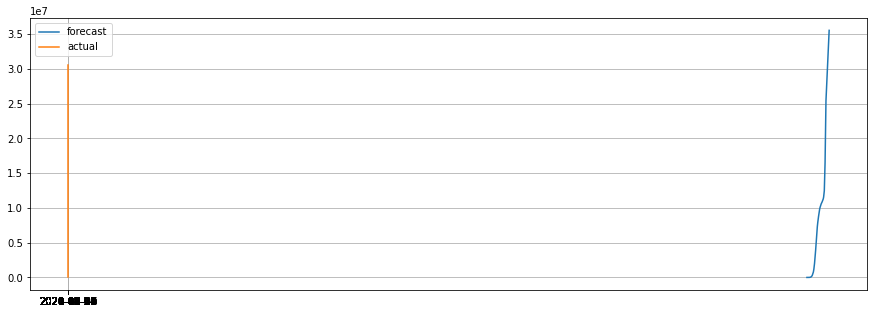

time: 5.26 s (started: 2021-07-14 13:38:24 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast4['ds'],forecast4['yhat'])
plt.plot(df_cases['ds'],df_cases['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv4 = cross_validation(model4, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv5 = cross_validation(model4, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-06 00:00:00 and 2021-02-04 00:00:00



time: 14.7 s (started: 2021-07-14 13:38:32 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv4)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
131 146 days  1.484527e+14  1.218412e+07  ...  0.329445  0.380394       0.5
132 147 days  1.496129e+14  1.223163e+07  ...  0.335527  0.387009       0.5
133 148 days  1.508477e+14  1.228201e+07  ...  0.342534  0.393215       0.5
134 149 days  1.521683e+14  1.233565e+07  ...  0.350209  0.399593       0.5
135 150 days  1.535903e+14  1.239315e+07  ...  0.357769  0.406220       0.5

[5 rows x 7 columns]

time: 257 ms (started: 2021-07-14 13:38:46 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv5)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
131 146 days  1.432627e+13  3.785006e+06  ...  0.625473  0.857156  0.333333
132 147 days  1.461618e+13  3.823112e+06  ...  0.624792  0.857488  0.333333
133 148 days  1.490458e+13  3.860644e+06  ...  0.624249  0.857828  0.333333
134 149 days  1.519077e+13  3.897533e+06  ...  0.623882  0.858030  0.333333
135 150 days  1.547409e+13  3.933712e+06  ...  0.623613  0.858076  0.333333

[5 rows x 7 columns]

time: 259 ms (started: 2021-07-14 13:38:47 +00:00)


VI. Visualize the Performance Metrics

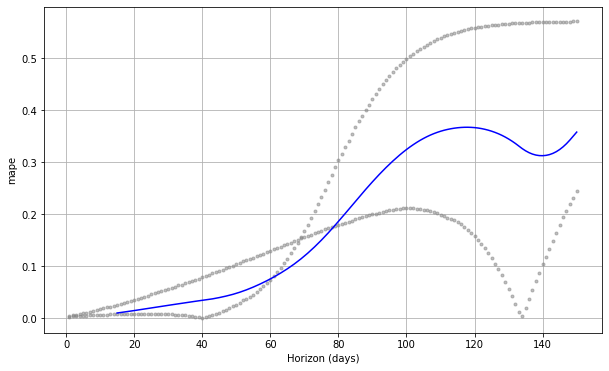

time: 255 ms (started: 2021-07-14 13:40:05 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv4, metric='mape')

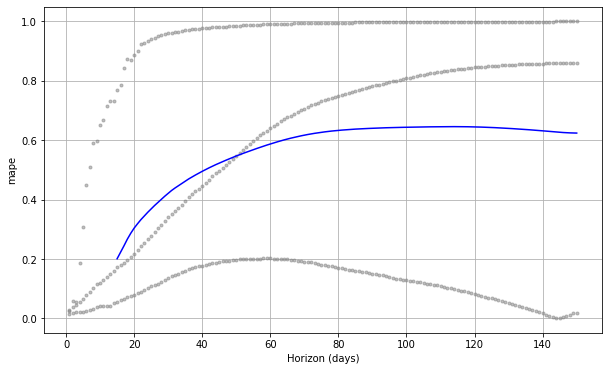

time: 252 ms (started: 2021-07-14 13:40:14 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv5, metric='mape')

**Total Deaths in India**


---



I. Data Preproccessing With Time series

In [ ]:
df_death = data.query("location=='India'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)
df_death.dropna(subset = ["y"], inplace=True)
df_death.head()

ds    y
41488  2020-03-11  1.0
41489  2020-03-12  1.0
41490  2020-03-13  2.0
41491  2020-03-14  2.0
41492  2020-03-15  2.0

time: 31.5 ms (started: 2021-07-14 13:40:25 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model5 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model5.fit(df_death)
future = model5.make_future_dataframe(periods=30)
future
forecast5 = model5.predict(future)
forecast5[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower     yhat_upper
0   2020-03-11    -128.995993   -5436.049058    5040.140644
1   2020-03-12     -78.221377   -4816.393758    5146.838481
2   2020-03-13    -104.604398   -5109.798226    5533.680894
3   2020-03-14    -158.597195   -5448.553527    5315.747125
4   2020-03-15    -238.581857   -5835.721692    5454.337922
..         ...            ...            ...            ...
506 2021-07-30  494162.847005  476446.685148  513566.435659
507 2021-07-31  496889.544317  478313.523015  517698.549454
508 2021-08-01  499590.249766  480894.244020  521971.429559
509 2021-08-02  502571.568802  483520.939244  524325.986557
510 2021-08-03  505361.077906  484607.857304  529048.965141

[511 rows x 4 columns]

time: 6.11 s (started: 2021-07-14 13:40:41 +00:00)


III. Plotting The Forecasts

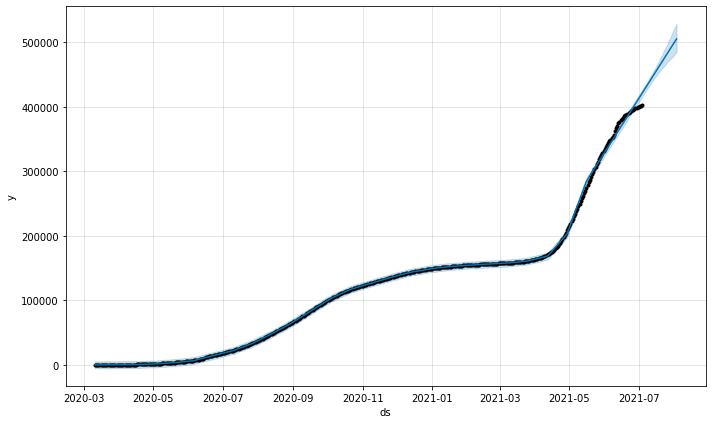

time: 557 ms (started: 2021-07-14 13:40:47 +00:00)


In [ ]:
model5.plot(forecast5);

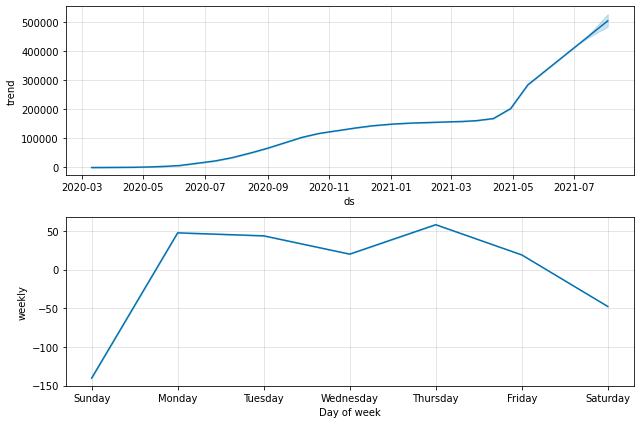

time: 482 ms (started: 2021-07-14 13:40:57 +00:00)


In [ ]:
model5.plot_components(forecast5);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


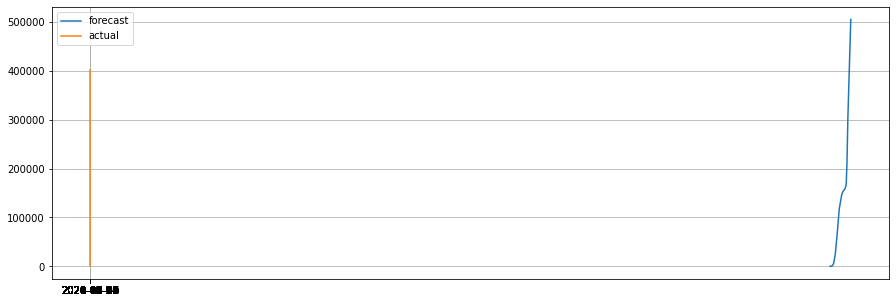

time: 4.8 s (started: 2021-07-14 13:41:05 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast5['ds'],forecast5['yhat'])
plt.plot(df_death['ds'],df_death['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv6 = cross_validation(model5, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv7 = cross_validation(model5, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-02-04 00:00:00 and 2021-02-04 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.



time: 16.7 s (started: 2021-07-14 13:41:44 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv6)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
131 146 days  4.533359e+10  212916.872296  ...  0.543593  0.544163       0.0
132 147 days  4.578290e+10  213969.386242  ...  0.544595  0.545256       0.0
133 148 days  4.620990e+10  214964.890519  ...  0.545523  0.546153       0.0
134 149 days  4.661962e+10  215915.781523  ...  0.546394  0.547154       0.0
135 150 days  4.700783e+10  216812.899585  ...  0.547201  0.547914       0.0

[5 rows x 7 columns]

time: 226 ms (started: 2021-07-14 13:42:03 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv7)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
131 146 days  2.901876e+09  53869.062254  ...  0.617299  0.747901  0.333333
132 147 days  2.962407e+09  54427.995575  ...  0.618638  0.748244  0.333333
133 148 days  3.022894e+09  54980.855409  ...  0.619964  0.748776  0.333333
134 149 days  3.083211e+09  55526.672908  ...  0.621326  0.748776  0.333333
135 150 days  3.143253e+09  56064.719000  ...  0.622631  0.748776  0.333333

[5 rows x 7 columns]

time: 253 ms (started: 2021-07-14 13:42:03 +00:00)


VI. Visualize the Performance Metrics

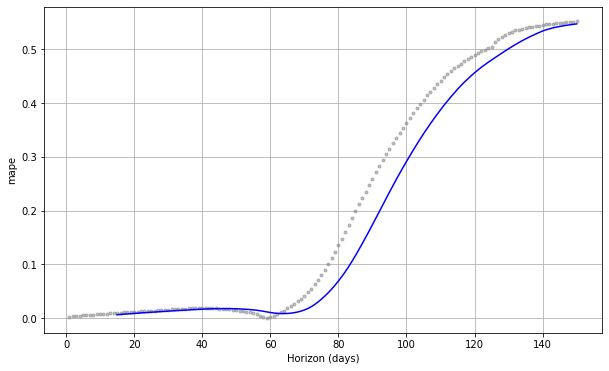

time: 251 ms (started: 2021-07-14 13:42:08 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv6, metric='mape')

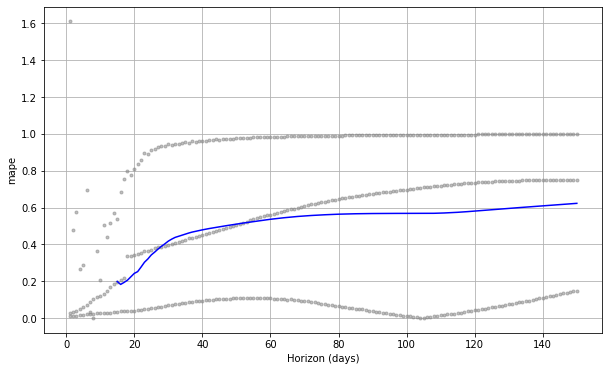

time: 276 ms (started: 2021-07-14 13:42:15 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv7, metric='mape')

**Total Vaccinated People in India**


---






I. Data Preproccessing With Time series

In [ ]:
df_vaccination = data.query("location=='India'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
41447  2020-01-30  1.0
41448  2020-01-31  1.0
41449  2020-02-01  1.0
41450  2020-02-02  2.0
41451  2020-02-03  3.0

time: 25.6 ms (started: 2021-07-14 13:42:35 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model6 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model6.fit(df_vaccination)
future = model6.make_future_dataframe(periods=30)
future
forecast6 = model6.predict(future)
forecast6[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-30 -8.019498e+07 -8.231584e+07 -7.832966e+07
1   2020-01-31 -7.978571e+07 -8.162602e+07 -7.773861e+07
2   2020-02-01 -7.928412e+07 -8.118583e+07 -7.735102e+07
3   2020-02-02 -7.999142e+07 -8.201130e+07 -7.800917e+07
4   2020-02-03 -7.936773e+07 -8.130210e+07 -7.758068e+07
..         ...           ...           ...           ...
547 2021-07-30  4.852708e+08  4.432093e+08  5.248843e+08
548 2021-07-31  4.907159e+08  4.470145e+08  5.331354e+08
549 2021-08-01  4.949521e+08  4.503980e+08  5.403185e+08
550 2021-08-02  5.005192e+08  4.542148e+08  5.484868e+08
551 2021-08-03  5.056867e+08  4.561307e+08  5.562700e+08

[552 rows x 4 columns]

time: 4.31 s (started: 2021-07-14 13:42:47 +00:00)


III. Plotting The Forecasts

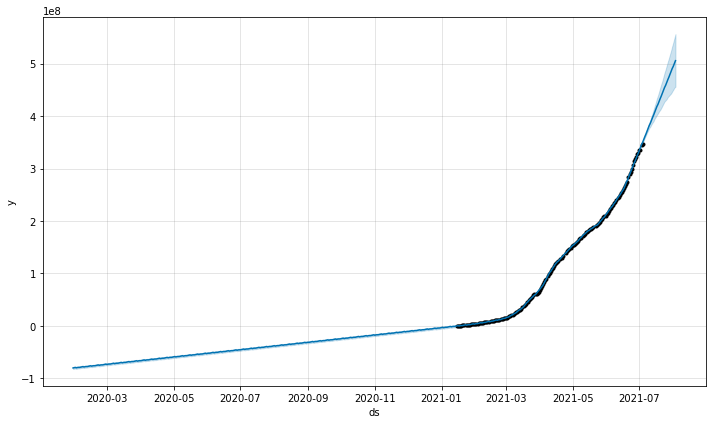

time: 324 ms (started: 2021-07-14 13:42:57 +00:00)


In [ ]:
model6.plot(forecast6);

''

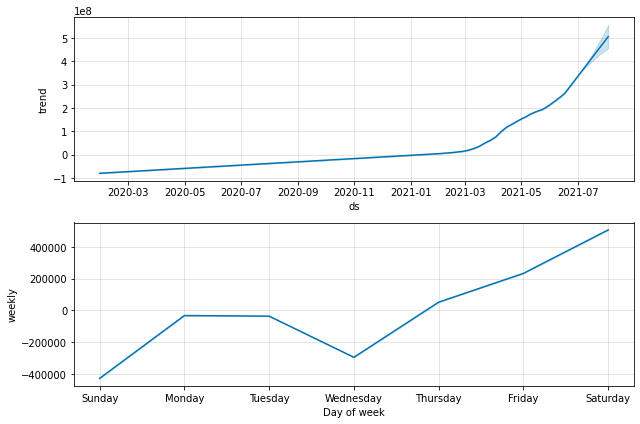

time: 817 ms (started: 2021-07-14 13:43:11 +00:00)


In [ ]:
model6.plot_components(forecast6);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


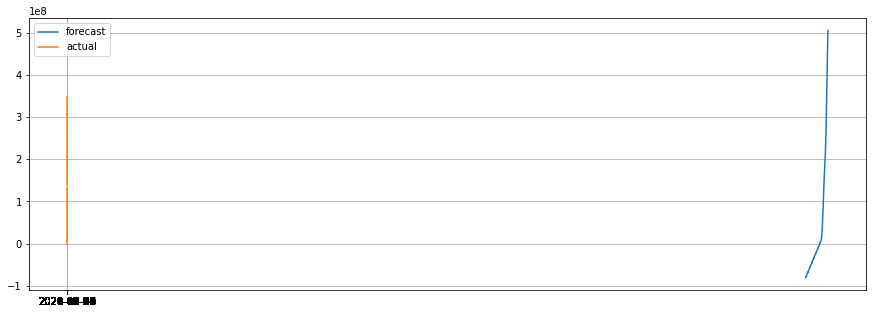

time: 5.25 s (started: 2021-07-14 13:43:21 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast6['ds'],forecast6['yhat'])
plt.plot(df_vaccination['ds'],df_vaccination['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv8 = cross_validation(model6, initial='30 days', period='15 days', horizon = '30 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])

INFO:fbprophet:Making 8 forecasts with cutoffs between 2021-02-19 00:00:00 and 2021-06-04 00:00:00



time: 22.2 s (started: 2021-07-14 13:43:36 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv8)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
22 26 days  4.954903e+14  2.225961e+07  ...  0.146303  0.140810  0.875000
23 27 days  5.513457e+14  2.348075e+07  ...  0.153594  0.142057  0.875000
24 28 days  5.933551e+14  2.435888e+07  ...  0.160659  0.140810  0.875000
25 29 days  6.705520e+14  2.589502e+07  ...  0.168067  0.142057  0.875000
26 30 days  7.608292e+14  2.758313e+07  ...  0.175138  0.150049  0.869565

[5 rows x 7 columns]

time: 122 ms (started: 2021-07-14 13:43:59 +00:00)


VI. Visualize the Performance Metrics

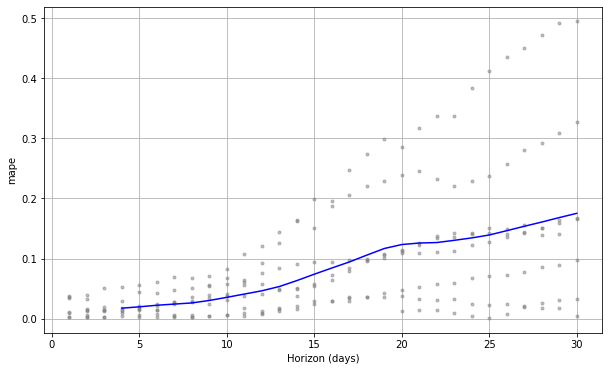

time: 232 ms (started: 2021-07-14 13:43:59 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv8, metric='mape')

## B. United States

**Total Covid 19 cases in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_cases_us = data.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)
df_cases_us.dropna(subset = ["y"], inplace=True)
df_cases_us.head()

ds    y
94948  2020-01-22  1.0
94949  2020-01-23  1.0
94950  2020-01-24  2.0
94951  2020-01-25  2.0
94952  2020-01-26  5.0

time: 31.6 ms (started: 2021-07-14 13:44:21 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model7 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model7.fit(df_cases_us)
future = model7.make_future_dataframe(periods=30)
future
forecast7 = model7.predict(future)
forecast7[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -4.886003e+03 -7.717471e+04  6.809057e+04
1   2020-01-23  5.204547e+02 -7.512885e+04  7.158393e+04
2   2020-01-24  7.489614e+03 -6.187831e+04  7.591893e+04
3   2020-01-25  8.313182e+03 -6.374980e+04  8.428367e+04
4   2020-01-26 -2.291672e+03 -7.178229e+04  7.117256e+04
..         ...           ...           ...           ...
555 2021-07-30  3.420404e+07  3.306925e+07  3.528298e+07
556 2021-07-31  3.422098e+07  3.297300e+07  3.535093e+07
557 2021-08-01  3.422649e+07  3.290949e+07  3.539979e+07
558 2021-08-02  3.423751e+07  3.286222e+07  3.553632e+07
559 2021-08-03  3.425344e+07  3.279938e+07  3.559770e+07

[560 rows x 4 columns]

time: 2.9 s (started: 2021-07-14 13:45:12 +00:00)


III. Plotting The Forecasts

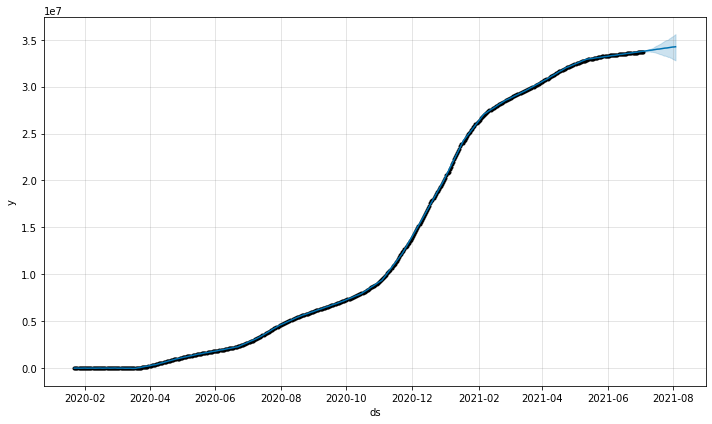

time: 335 ms (started: 2021-07-14 13:45:22 +00:00)


In [ ]:
model7.plot(forecast7);

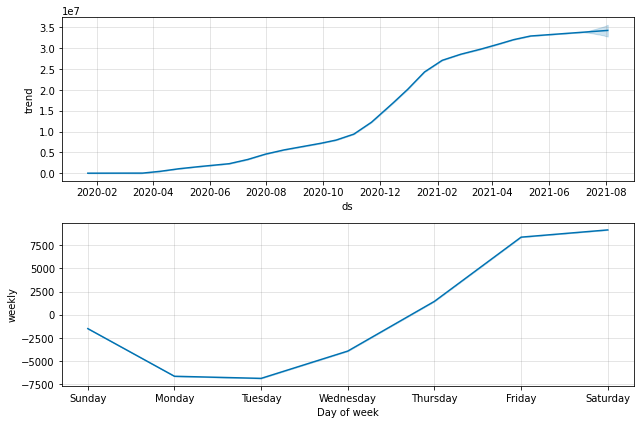

time: 560 ms (started: 2021-07-14 13:45:36 +00:00)


In [ ]:
model7.plot_components(forecast7);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


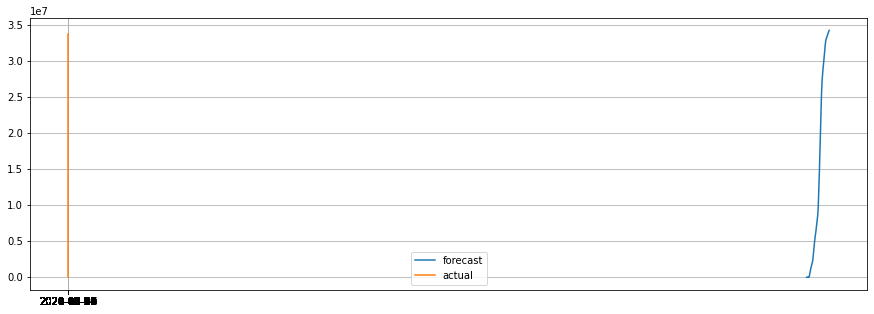

time: 5.49 s (started: 2021-07-14 13:45:48 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast7['ds'],forecast7['yhat'])
plt.plot(df_cases_us['ds'],df_cases_us['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv9 = cross_validation(model7, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv10 = cross_validation(model7, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-06 00:00:00 and 2021-02-04 00:00:00



time: 14.8 s (started: 2021-07-14 13:46:00 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv9)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
131 146 days  2.468124e+14  1.571026e+07  ...  0.408189  0.400532       0.5
132 147 days  2.515057e+14  1.585893e+07  ...  0.412471  0.405220       0.5
133 148 days  2.562329e+14  1.600728e+07  ...  0.416714  0.409413       0.5
134 149 days  2.610275e+14  1.615635e+07  ...  0.421006  0.414014       0.5
135 150 days  2.658666e+14  1.630542e+07  ...  0.425308  0.418485       0.5

[5 rows x 7 columns]

time: 222 ms (started: 2021-07-14 13:46:30 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv10)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
131 146 days  2.393733e+13  4.892579e+06  ...  0.570717  0.404889       0.0
132 147 days  2.483327e+13  4.983299e+06  ...  0.572668  0.407111       0.0
133 148 days  2.576751e+13  5.076171e+06  ...  0.574650  0.408561       0.0
134 149 days  2.675352e+13  5.172381e+06  ...  0.576678  0.409623       0.0
135 150 days  2.780807e+13  5.273336e+06  ...  0.578830  0.411964       0.0

[5 rows x 7 columns]

time: 237 ms (started: 2021-07-14 13:46:48 +00:00)


VI. Visualize the Performance Metrics

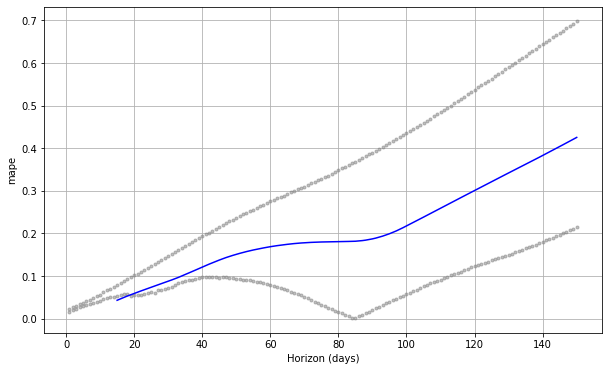

time: 271 ms (started: 2021-07-14 13:46:58 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv9, metric='mape')

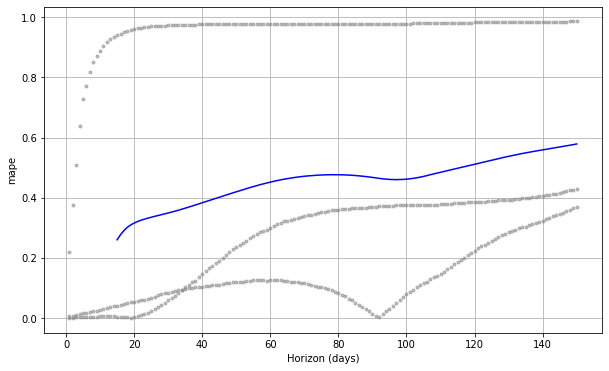

time: 242 ms (started: 2021-07-14 13:47:04 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv10, metric='mape')

**Total Deaths in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_death_USA = data.query("location=='United States'")[['date','total_deaths']].rename({'date':'ds','total_deaths':'y'},axis=1)
df_death_USA.dropna(subset = ["y"], inplace=True)
df_death_USA.head()

ds     y
94986  2020-02-29   1.0
94987  2020-03-01   1.0
94988  2020-03-02   6.0
94989  2020-03-03   7.0
94990  2020-03-04  11.0

time: 29.2 ms (started: 2021-07-14 13:47:12 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
from fbprophet import Prophet
model_USA = Prophet(interval_width=0.8 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
train_USA , test_USA = df_death_USA[30:500] , df_death_USA[500:]
model_USA.fit(train_USA) 
future_USA = model_USA.make_future_dataframe(periods=57)
forecast_USA = model_USA.predict(future_USA)
forecast_USA[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower     yhat_upper
0   2020-03-30    1421.300589     670.277367    2178.542610
1   2020-03-31    3655.545488    2847.041924    4412.914236
2   2020-04-01    6067.213028    5280.878088    6887.372945
3   2020-04-02    8356.393199    7529.407910    9103.700191
4   2020-04-03   10532.160471    9737.971724   11274.899317
..         ...            ...            ...            ...
514 2021-08-26  628547.123901  605723.528298  655371.832061
515 2021-08-27  629094.852222  605430.744412  656541.337365
516 2021-08-28  629383.202240  605117.765499  657744.246797
517 2021-08-29  629222.453481  604126.897567  658609.825120
518 2021-08-30  629258.586310  603543.852040  659222.194902

[519 rows x 4 columns]

time: 4.04 s (started: 2021-07-14 13:47:26 +00:00)


III. Plotting The Forecasts

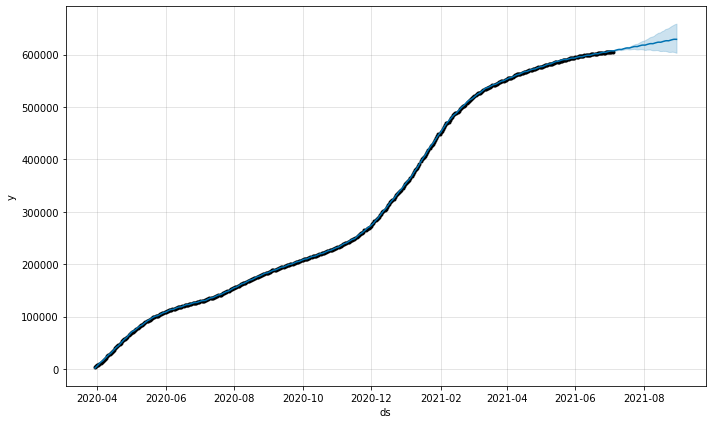

time: 330 ms (started: 2021-07-14 13:47:43 +00:00)


In [ ]:
model_USA.plot(forecast_USA);

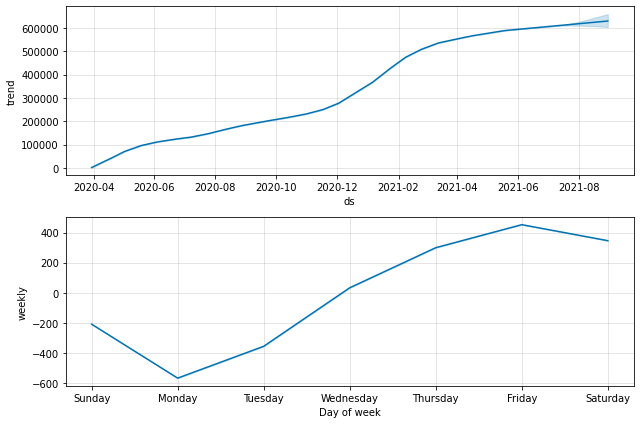

time: 612 ms (started: 2021-07-14 13:48:02 +00:00)


In [ ]:
model_USA.plot_components(forecast_USA);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


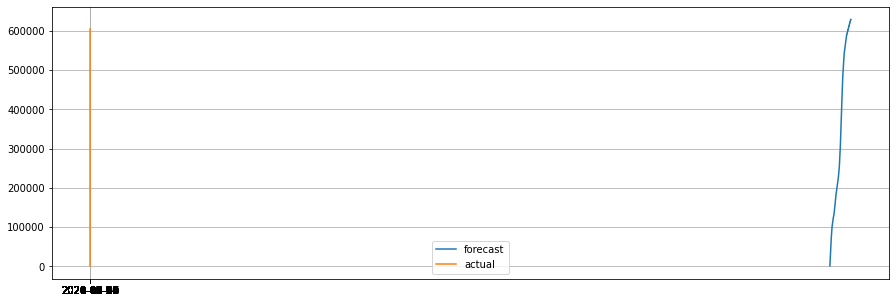

time: 6.28 s (started: 2021-07-14 13:48:10 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast_USA['ds'],forecast_USA['yhat'])
plt.plot(df_death_USA['ds'],df_death_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv11)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
77 86 days  2.859630e+09  53475.506047  ...  0.088484  0.088835       1.0
78 87 days  2.966407e+09  54464.735742  ...  0.090080  0.089690       1.0
79 88 days  3.071731e+09  55423.202477  ...  0.091621  0.090693       1.0
80 89 days  3.177860e+09  56372.508611  ...  0.093147  0.092571       1.0
81 90 days  3.281967e+09  57288.453724  ...  0.094632  0.094784       1.0

[5 rows x 7 columns]

time: 207 ms (started: 2021-07-14 13:51:09 +00:00)


VI. Visualize the Performance Metrics

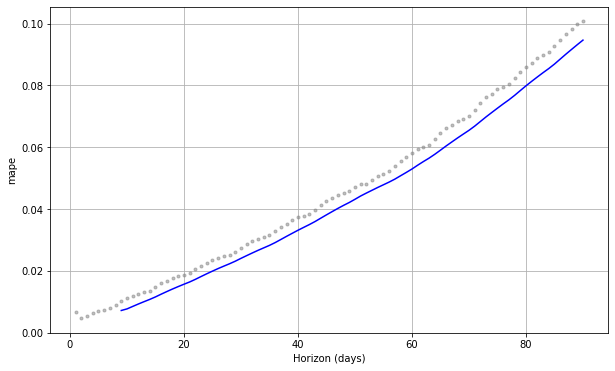

time: 243 ms (started: 2021-07-14 13:51:22 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv11, metric='mape')

**Total People Vaccinated in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_vaccination_us = data.query("location=='United States'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
41447  2020-01-30  1.0
41448  2020-01-31  1.0
41449  2020-02-01  1.0
41450  2020-02-02  2.0
41451  2020-02-03  3.0

time: 36.1 ms (started: 2021-07-14 13:51:34 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model8 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model8.fit(df_vaccination_us)
future = model8.make_future_dataframe(periods=30)
future
forecast8 = model8.predict(future)
forecast8[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -8.440509e+07 -8.516379e+07 -8.366066e+07
1   2020-01-23 -8.406927e+07 -8.482618e+07 -8.333023e+07
2   2020-01-24 -8.352160e+07 -8.425396e+07 -8.274759e+07
3   2020-01-25 -8.265034e+07 -8.344627e+07 -8.189261e+07
4   2020-01-26 -8.218850e+07 -8.295600e+07 -8.147123e+07
..         ...           ...           ...           ...
555 2021-07-30  3.548629e+08  3.322604e+08  3.780108e+08
556 2021-07-31  3.564285e+08  3.322541e+08  3.808253e+08
557 2021-08-01  3.575848e+08  3.320983e+08  3.835701e+08
558 2021-08-02  3.581108e+08  3.314760e+08  3.852404e+08
559 2021-08-03  3.584583e+08  3.307368e+08  3.872127e+08

[560 rows x 4 columns]

time: 4.18 s (started: 2021-07-14 13:51:45 +00:00)


III. Plotting The Forecasts

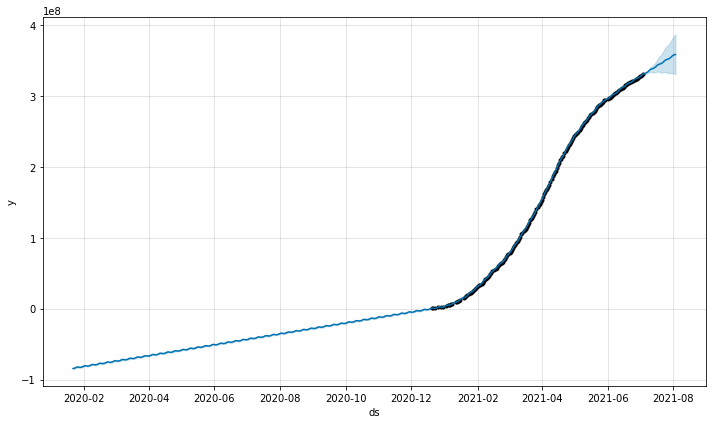

time: 332 ms (started: 2021-07-14 13:51:58 +00:00)


In [ ]:
model8.plot(forecast8);

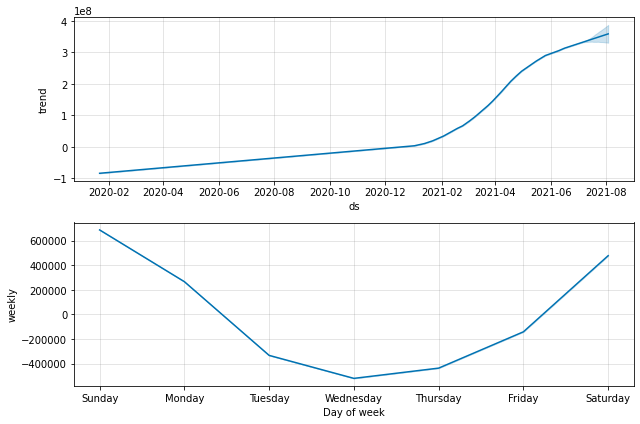

time: 497 ms (started: 2021-07-14 13:52:08 +00:00)


In [ ]:
model8.plot_components(forecast8);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


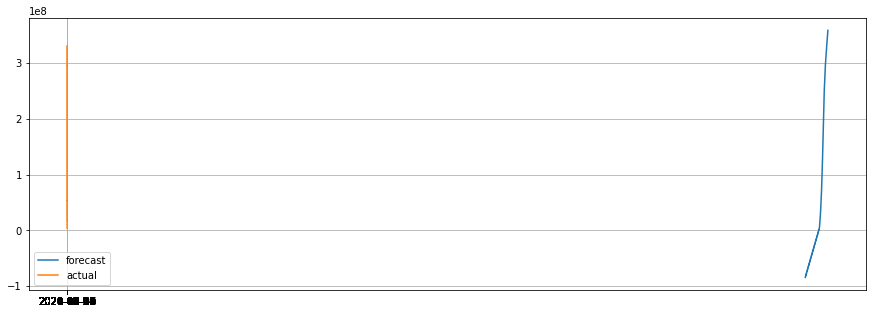

time: 6.35 s (started: 2021-07-14 13:52:16 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast8['ds'],forecast8['yhat'])
plt.plot(df_vaccination_us['ds'],df_vaccination_us['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv13 = cross_validation(model6, initial='30 days', period='15 days', horizon = '30 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])

INFO:fbprophet:Making 8 forecasts with cutoffs between 2021-02-19 00:00:00 and 2021-06-04 00:00:00



time: 22.3 s (started: 2021-07-14 13:52:32 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv13)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
22 26 days  4.954903e+14  2.225961e+07  ...  0.146303  0.140810  0.875000
23 27 days  5.513457e+14  2.348075e+07  ...  0.153594  0.142057  0.875000
24 28 days  5.933551e+14  2.435888e+07  ...  0.160659  0.140810  0.875000
25 29 days  6.705520e+14  2.589502e+07  ...  0.168067  0.142057  0.875000
26 30 days  7.608292e+14  2.758313e+07  ...  0.175138  0.150049  0.869565

[5 rows x 7 columns]

time: 132 ms (started: 2021-07-14 13:53:00 +00:00)


VI. Visualize the Performance Metrics

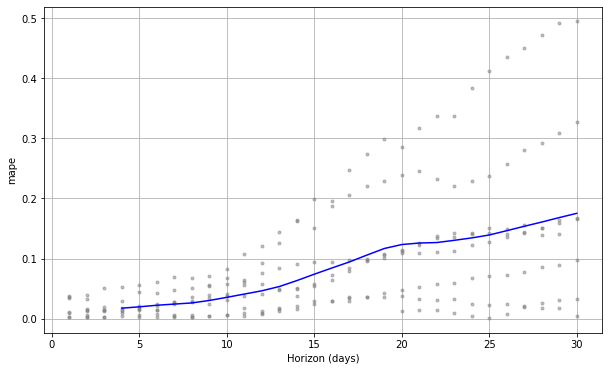

time: 238 ms (started: 2021-07-14 13:53:07 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv13, metric='mape')

# 10. Conclusion

Q.1] Which Country is having highest number of cases?

In [ ]:
maxid = df_new1[['Number of Cases']].idxmax()
loc = df_new1.loc[maxid]
print("Country of Highest Number of Covid-19 Cases\n",loc)

Country of Highest Number of Covid-19 Cases
       Location  Number of Cases
98792    World        183781831
time: 44.8 ms (started: 2021-07-14 13:53:29 +00:00)


Q.2] Which Country is having Lowest number of cases?

In [ ]:
minid = df_new1[['Number of Cases']].idxmin()
loc = df_new1.loc[minid]
print("Country of Lowest Number of Covid-19 Cases\n",loc)

Country of Lowest Number of Covid-19 Cases
       Location  Number of Cases
0  Afghanistan                1
time: 15.6 ms (started: 2021-07-14 13:53:34 +00:00)


Q.3] Which Country is having Highest number of deaths?

In [ ]:
maxid = df_new3[['Number of Death']].idxmax()
loc = df_new3.loc[maxid]
print("Country of highest Number of Death\n",loc)

Country of highest Number of Death
       Location  Number of Death
98792    World          3977058
time: 15.9 ms (started: 2021-07-14 13:53:42 +00:00)


Q.4] Which Country is having Lowest number of Deaths?

In [ ]:
minid = df_new3[['Number of Death']].idxmin()
loc = df_new3.loc[minid]
print("Location of Lowest Number of Deaths\n",loc)

Location of Lowest Number of Deaths
        Location  Number of Death
27  Afghanistan                1
time: 13.8 ms (started: 2021-07-14 13:53:48 +00:00)


Q.5] Which Country is most Vaccinated?

In [ ]:
maxid = df_new5[['total_vaccinations']].idxmax()
loc = df_new5.loc[maxid]
print("Most Vaccinated Country\n",loc)

Most Vaccinated Country
       Location  total_vaccinations
98792    World          3219976078
time: 13.6 ms (started: 2021-07-14 13:54:02 +00:00)


Q.6] Which Country is least Vaccinated?

In [ ]:
minid = df_new5[['total_vaccinations']].idxmin()
loc = df_new5.loc[minid]
print("Lowest Vaccinated Country\n",loc)

Lowest Vaccinated Country
         Location  total_vaccinations
364  Afghanistan                   0
time: 13.1 ms (started: 2021-07-14 13:54:06 +00:00)


Q.7] Date of highest Number of Cases?

In [ ]:
maxid = df_new2[['Number of Cases']].idxmax()
loc = df_new2.loc[maxid]
print("Date of highest Number of Cases\n",loc)

Date of highest Number of Cases
             Date  Number of Cases
98792 2021-07-04        183781831
time: 20.1 ms (started: 2021-07-14 13:54:14 +00:00)


Q.8] Date of Lowest Number of Cases?

In [ ]:
minid = df_new2[['Number of Cases']].idxmin()
loc = df_new2.loc[minid]
print("Date of Lowest Number of Cases\n",loc)

Date of Lowest Number of Cases
         Date  Number of Cases
0 2020-02-24                1
time: 15.9 ms (started: 2021-07-14 13:55:49 +00:00)


Q.9] Date of highest Number of Death?

In [ ]:
maxid = df_new4[['Number of Death']].idxmax()
loc = df_new4.loc[maxid]
print("Country of highest Number of Death\n",loc)

Country of highest Number of Death
             Date  Number of Death
98792 2021-07-04          3977058
time: 15.4 ms (started: 2021-07-14 13:56:03 +00:00)


Q.10] Date of Lowest Number of Death?

In [ ]:
minid = df_new4[['Number of Death']].idxmin()
loc = df_new4.loc[minid]
print("Location of Lowest Number of Deaths\n",loc)

Location of Lowest Number of Deaths
          Date  Number of Death
27 2020-03-22                1


Q.11] Date of maximum people vaccinated?

In [ ]:
maxid = df_new6[['total_vaccinations']].idxmax()
loc = df_new6.loc[maxid]
print("Date of maximum people vaccinated\n",loc)

Date of maximum people vaccinated
             Date  total_vaccinations
18319 2021-04-07          1305499000


Q.12] Date of minimum people vaccinated?

In [ ]:
minid = df_new6[['total_vaccinations']].idxmin()
loc = df_new6.loc[minid]
print("Date of minimum people vaccinated\n",loc)

Date of minimum people vaccinated
           Date  total_vaccinations
364 2021-02-22                   0


Q.13] Mean of total cases in country?

In [ ]:
mean = df_new1.mean()
print("Mean of total cases\n",mean)

Mean of total cases
 Number of Cases    355088.268834
dtype: float64


Q.14] Mean of total death cases in country?

In [ ]:
mean = df_new3.mean()
print("Mean of total death cases\n",mean)

Mean of total death cases
 Number of Death    9572.846639
dtype: float64


Q.15] Mean of total vaccination in country?

In [ ]:
mean = df_new5.mean()
print("Mean of total vaccination\n",mean)

Mean of total vaccination
 total_vaccinations    1.083354e+07
dtype: float64




---



---



---



---


# 11. Case Study Part III 
(OPTIONAL)

# Case 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#df_n = pd.read_csv('/content/owid-covid-data.csv' , parse_dates=[3])

df_n = pd.read_csv("/content/drive/MyDrive/Major Project ML/owid-covid-data.csv", parse_dates=[3])
df_n
         

iso_code continent  ... human_development_index excess_mortality
0           AFG      Asia  ...                   0.511              NaN
1           AFG      Asia  ...                   0.511              NaN
2           AFG      Asia  ...                   0.511              NaN
3           AFG      Asia  ...                   0.511              NaN
4           AFG      Asia  ...                   0.511              NaN
...         ...       ...  ...                     ...              ...
100185      ZWE    Africa  ...                   0.571              NaN
100186      ZWE    Africa  ...                   0.571              NaN
100187      ZWE    Africa  ...                   0.571              NaN
100188      ZWE    Africa  ...                   0.571              NaN
100189      ZWE    Africa  ...                   0.571              NaN

[100190 rows x 60 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_n.head()

iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 60 columns]

In [ ]:
df_n.tail()

iso_code continent  ... human_development_index excess_mortality
100185      ZWE    Africa  ...                   0.571              NaN
100186      ZWE    Africa  ...                   0.571              NaN
100187      ZWE    Africa  ...                   0.571              NaN
100188      ZWE    Africa  ...                   0.571              NaN
100189      ZWE    Africa  ...                   0.571              NaN

[5 rows x 60 columns]

In [ ]:
df_n['continent'].value_counts()

Africa           25791
Europe           23742
Asia             23714
North America    12409
South America     6015
Oceania           3823
Name: continent, dtype: int64

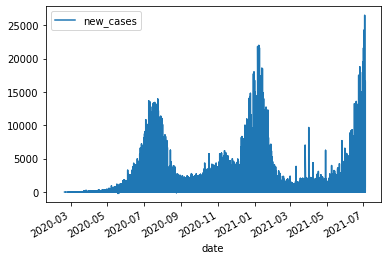

time: 357 ms (started: 2021-07-14 13:58:49 +00:00)


In [ ]:
df_n.set_index('date').query("continent == 'Africa'")[['new_cases']].plot()

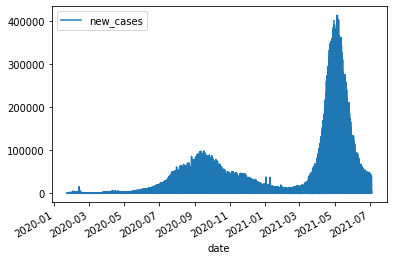

time: 346 ms (started: 2021-07-14 13:58:58 +00:00)


In [ ]:
df_n.set_index('date').query("continent=='Asia'")[['new_cases']].plot()

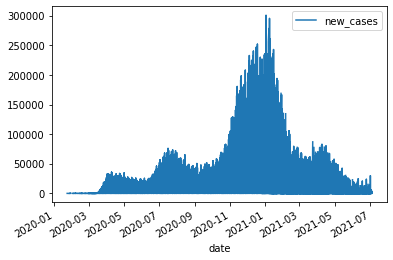

In [ ]:
df_n.set_index('date').query("continent=='North America'")[['new_cases']].plot()

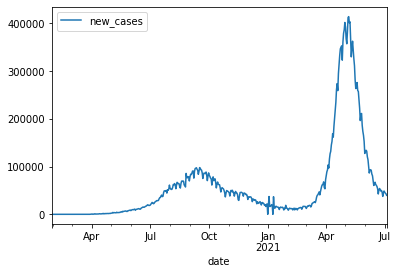

In [ ]:
df_n.set_index('date').query("location=='India'")[['new_cases']].plot()

In [ ]:
df_new_cases = df_n.copy()

In [ ]:
df_new_cases['new_cases']

0            1.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
100185    1331.0
100186    1357.0
100187    1442.0
100188    1002.0
100189     809.0
Name: new_cases, Length: 100190, dtype: float64

time: 10.3 ms (started: 2021-07-14 13:59:24 +00:00)


In [ ]:
df_new_cases['date'].value_counts()

2021-05-26    225
2021-05-25    225
2021-05-27    225
2021-05-21    224
2021-05-24    224
             ... 
2020-01-05      3
2020-01-04      3
2020-01-02      2
2020-01-01      2
2020-01-03      2
Name: date, Length: 551, dtype: int64

time: 12.6 ms (started: 2021-07-14 13:59:43 +00:00)


In [ ]:
df_2 =  df_new_cases.date.unique()

time: 5.41 ms (started: 2021-07-14 14:02:04 +00:00)


In [ ]:
dates = {'date' : df_2}

time: 846 µs (started: 2021-07-14 14:02:09 +00:00)


In [ ]:
df_2 = pd.DataFrame(df_2 , columns= ['date'])

time: 1.39 ms (started: 2021-07-14 14:02:15 +00:00)


In [ ]:
df_2.head()

date
0 2020-02-24
1 2020-02-25
2 2020-02-26
3 2020-02-27
4 2020-02-28

time: 10.3 ms (started: 2021-07-14 14:02:24 +00:00)


In [ ]:
df_2.tail()

date
546 2020-02-08
547 2020-02-09
548 2020-02-10
549 2020-02-11
550 2020-02-12

time: 12.1 ms (started: 2021-07-14 14:02:29 +00:00)


In [ ]:
df_new_cases['new_cases'] = df_new_cases['new_cases'].replace('nan', np.nan).fillna(0)
df_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100190 entries, 0 to 100189
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               100190 non-null  object        
 1   continent                              95494 non-null   object        
 2   location                               100190 non-null  object        
 3   date                                   100190 non-null  datetime64[ns]
 4   total_cases                            96584 non-null   float64       
 5   new_cases                              100190 non-null  float64       
 6   new_cases_smoothed                     95571 non-null   float64       
 7   total_deaths                           86431 non-null   float64       
 8   new_deaths                             86587 non-null   float64       
 9   new_deaths_smoothed                    95571 non

In [ ]:
df_3 = df_new_cases.groupby(['date']).sum()

In [ ]:
df_3 = df_3['new_cases']

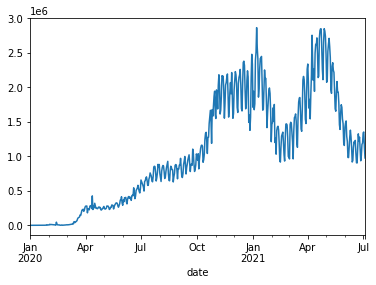

In [ ]:
df_3.plot()

In [ ]:
len(df_3)

551

time: 3.21 ms (started: 2021-07-14 14:02:48 +00:00)


In [ ]:
df_3 = pd.DataFrame(df_3)


In [ ]:
df_3 = df_3.reset_index()[['date' , 'new_cases']].rename({'date' : 'ds' , 'new_cases' : 'y'} , axis = 'columns')

In [ ]:
from fbprophet import Prophet

In [ ]:
model1 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)

In [ ]:
model1.fit(df_3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_new_cases = model1.make_future_dataframe(periods=30)

In [ ]:
future_new_cases.tail()

ds
576 2021-07-30
577 2021-07-31
578 2021-08-01
579 2021-08-02
580 2021-08-03

In [ ]:
pred_new_cases = model1.predict(future_new_cases)

In [ ]:
pred_new_cases.tail()

ds          trend  ...  multiplicative_terms_upper           yhat
576 2021-07-30  203630.513372  ...                         0.0  308637.291748
577 2021-07-31  180287.347321  ...                         0.0  168359.647387
578 2021-08-01  156944.181271  ...                         0.0   -8941.541749
579 2021-08-02  133601.015220  ...                         0.0  -23358.832148
580 2021-08-03  110257.849169  ...                         0.0  111006.459724

[5 rows x 16 columns]

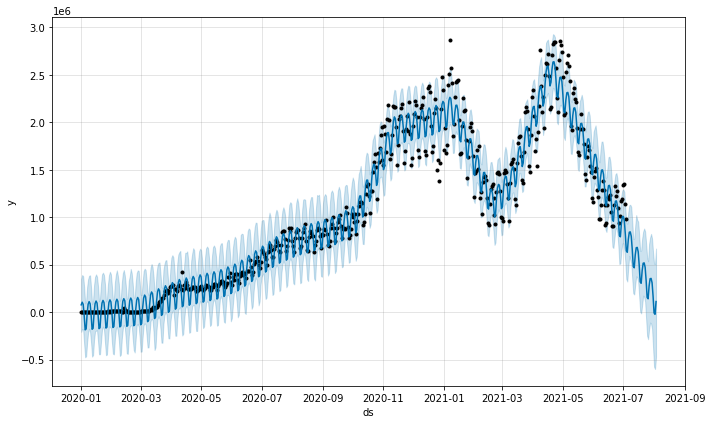

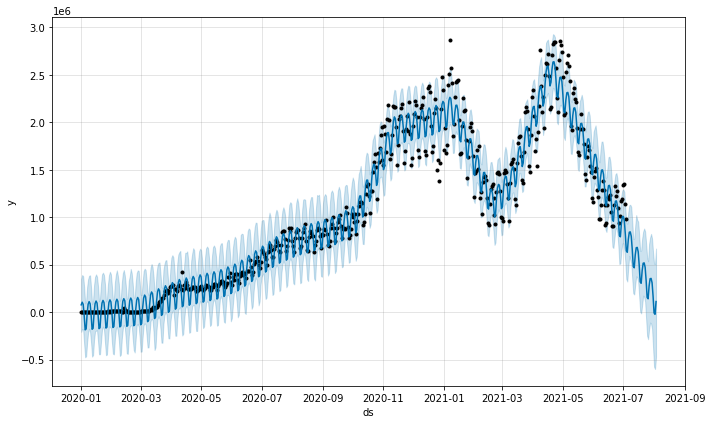

In [ ]:
model1.plot(pred_new_cases)

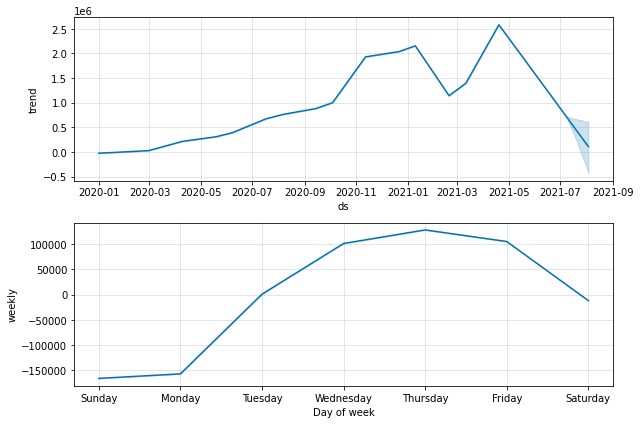

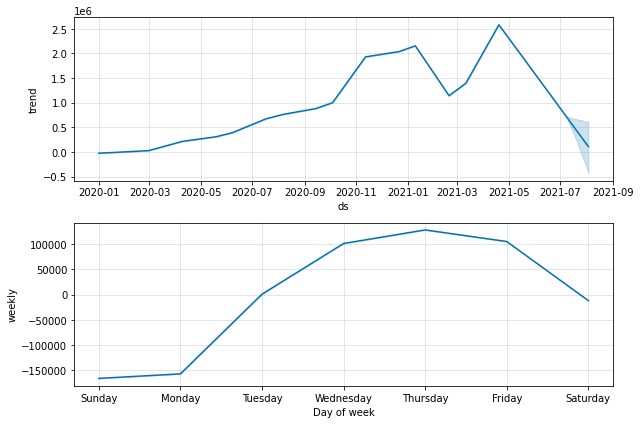

In [ ]:
model1.plot_components(pred_new_cases)

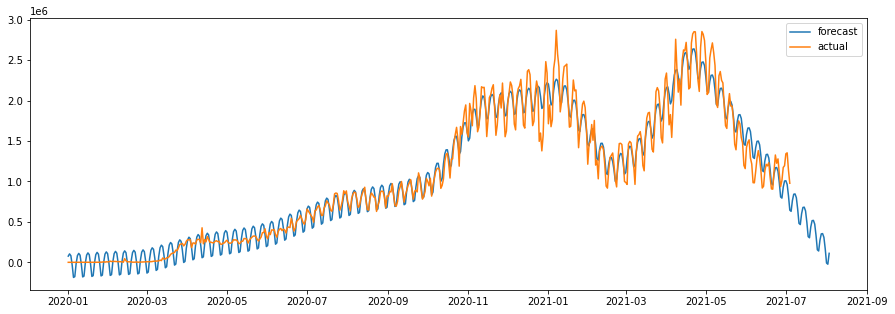

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_new_cases['ds'], pred_new_cases['yhat'])
plt.plot(df_3['ds'],df_3['y'])
plt.legend(labels=['forecast','actual'])


In [ ]:
df_4 = df_n.groupby(['date']).sum()

In [ ]:
df_4 = df_4['new_deaths']

In [ ]:
df_4 = pd.DataFrame(df_4)

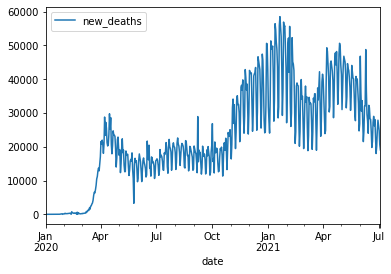

In [ ]:
df_4.plot()

In [ ]:
df_4 = df_4.reset_index()[['date' , 'new_deaths']].rename({'date' : 'ds' , 'new_deaths' : 'y'} , axis = 'columns')

In [ ]:
model2 = Prophet(interval_width=0.75 , changepoint_prior_scale=0.5 , changepoint_range=0.90)

In [ ]:
model2.fit(df_4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_1 = model2.make_future_dataframe(periods=30)

In [ ]:
future_1.tail()

ds
576 2021-07-30
577 2021-07-31
578 2021-08-01
579 2021-08-02
580 2021-08-03

In [ ]:
pred_new_deaths = model2.predict(future_1)

In [ ]:
pred_new_deaths.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
576 2021-07-30  13552.298857  ...                         0.0  15859.787647
577 2021-07-31  13214.413856  ...                         0.0  11617.513253
578 2021-08-01  12876.528856  ...                         0.0   6156.734458
579 2021-08-02  12538.643855  ...                         0.0   8506.150146
580 2021-08-03  12200.758855  ...                         0.0  15814.877255

[5 rows x 16 columns]

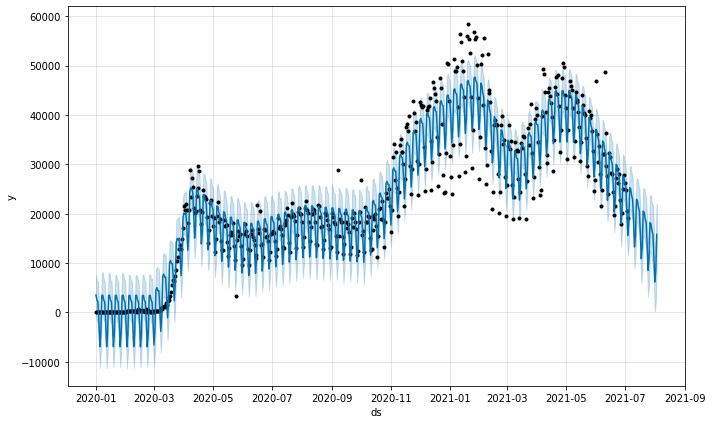

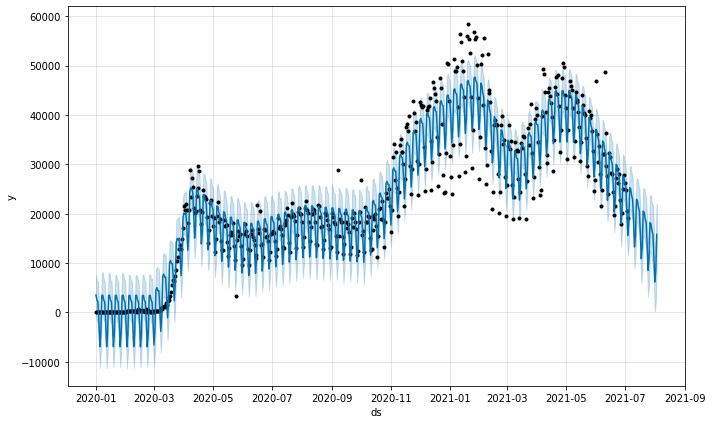

In [ ]:
model2.plot(pred_new_deaths)

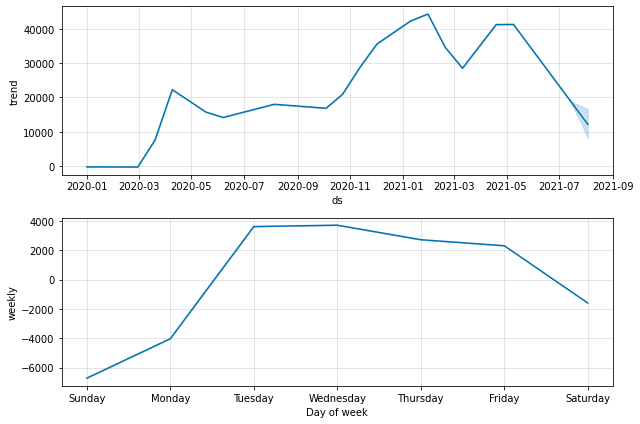

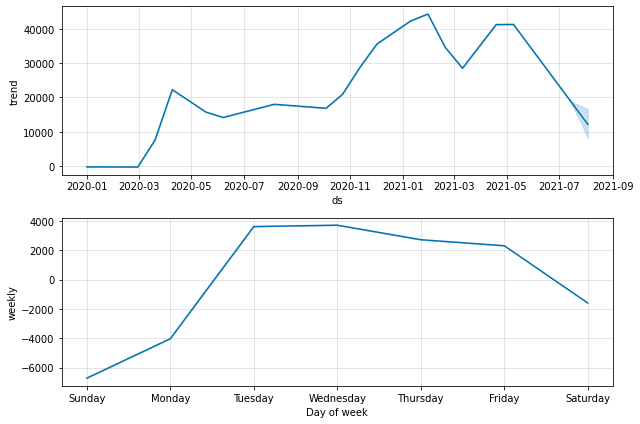

In [ ]:
model2.plot_components(pred_new_deaths)

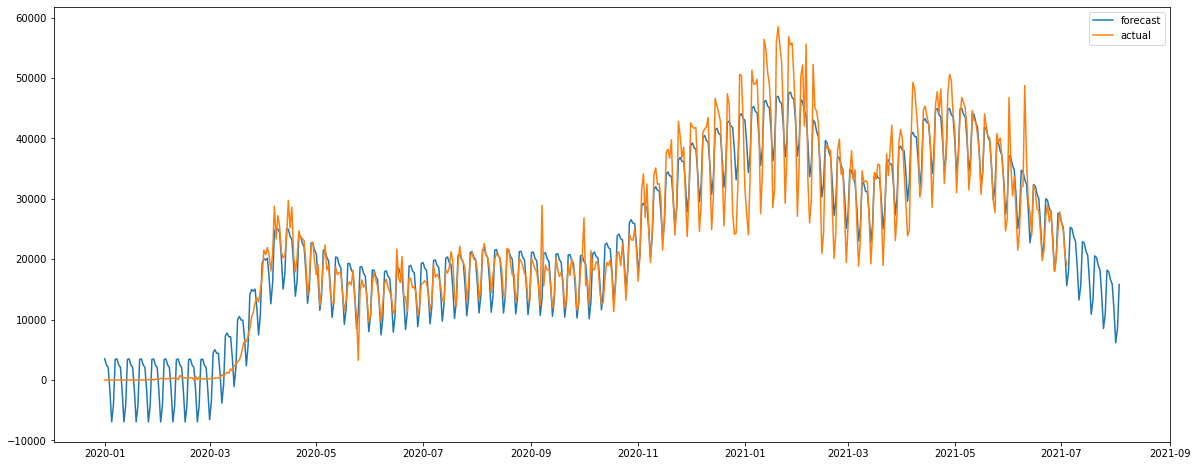

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(pred_new_deaths['ds'], pred_new_deaths['yhat'])
plt.plot(df_4['ds'],df_4['y'])
plt.legend(labels=['forecast','actual'])

 ### B. United States

In [ ]:
df_5 = df_n[(df_n['date'] == '2021-07-04')]

In [ ]:
df_5.head()

iso_code continent  ... human_development_index excess_mortality
496        AFG      Asia  ...                   0.511              NaN
1004  OWID_AFR       NaN  ...                     NaN              NaN
1500       ALB    Europe  ...                   0.795              NaN
1996       DZA    Africa  ...                   0.748              NaN
2486       AND    Europe  ...                   0.868              NaN

[5 rows x 60 columns]

In [ ]:
df_5 = df_5.sort_values('new_cases' , ascending= False)

In [ ]:
df_5.head(10)

iso_code      continent  ... human_development_index excess_mortality
98792  OWID_WRL            NaN  ...                   0.737              NaN
5247   OWID_ASI            NaN  ...                     NaN              NaN
83816  OWID_SAM            NaN  ...                     NaN              NaN
30660  OWID_EUR            NaN  ...                     NaN              NaN
41968       IND           Asia  ...                   0.645              NaN
1004   OWID_AFR            NaN  ...                     NaN              NaN
13235       BRA  South America  ...                   0.765              NaN
42458       IDN           Asia  ...                   0.718              NaN
19843       COL  South America  ...                   0.767              NaN
74889       RUS         Europe  ...                   0.824              NaN

[10 rows x 60 columns]

In [ ]:
df_5 = df_5.drop(df_5.index[[0,1,2,3,5]])

In [ ]:
import plotly.express as px

fig = px.bar(df_5, x='location', y='new_cases',
             hover_data=['location', 'new_cases'], color='new_cases',text = df_5.new_cases,
             labels={'pop':'new_cases globally'}, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [ ]:
df_5 = df_5.sort_values('new_deaths' , ascending= False)
import plotly.express as px

fig = px.bar(df_5, x='location', y='new_deaths',
             hover_data=['location', 'new_deaths'], color='new_deaths',text = df_5.new_cases,
             labels={'pop':'new_deaths globally'}, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

**# Clearly the country with the most rapidly increasing number of new deaths as of 4th July 2021 is Brazil**

# India

<Figure size 576x576 with 0 Axes>

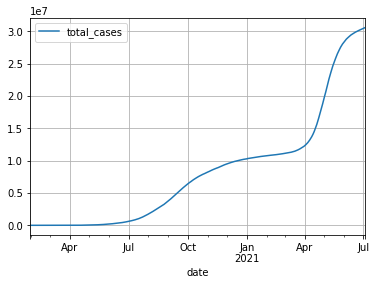

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='India'")[['total_cases']].plot()
plt.grid()

<Figure size 576x576 with 0 Axes>

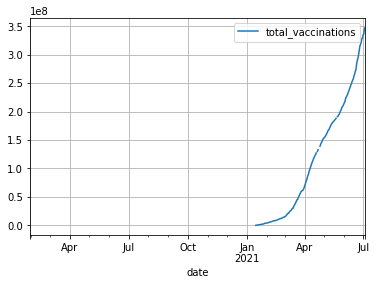

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='India'")[['total_vaccinations']].plot()
plt.grid()

In [ ]:
df_ind_tc = df_n.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [ ]:
df_ind_tc.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df_ind_tc.head()

ds    y
41447 2020-01-30  1.0
41448 2020-01-31  1.0
41449 2020-02-01  1.0
41450 2020-02-02  2.0
41451 2020-02-03  3.0

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model.fit(df_ind_tc)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
future.tail()

ds
547 2021-07-30
548 2021-07-31
549 2021-08-01
550 2021-08-02
551 2021-08-03

In [ ]:
pred_ind_tc = model.predict(future)

In [ ]:
pred_ind_tc.head()

ds        trend  ...  multiplicative_terms_upper         yhat
0 2020-01-30 -2491.620095  ...                         0.0 -2659.572745
1 2020-01-31 -2417.190797  ...                         0.0  -345.478823
2 2020-02-01 -2342.761499  ...                         0.0 -1129.880878
3 2020-02-02 -2268.332202  ...                         0.0 -4943.195037
4 2020-02-03 -2193.902904  ...                         0.0  1518.885641

[5 rows x 16 columns]

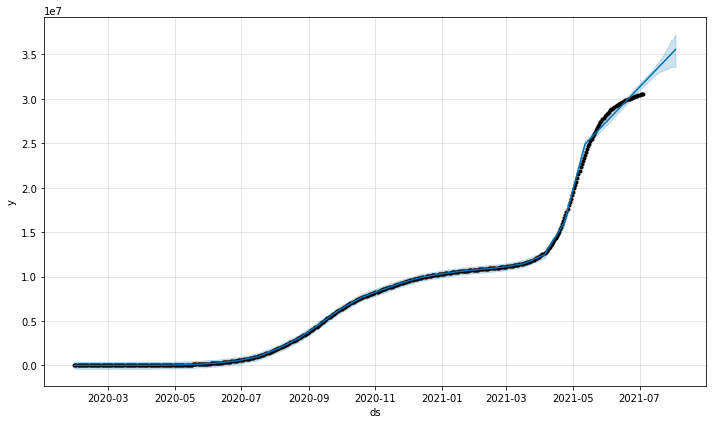

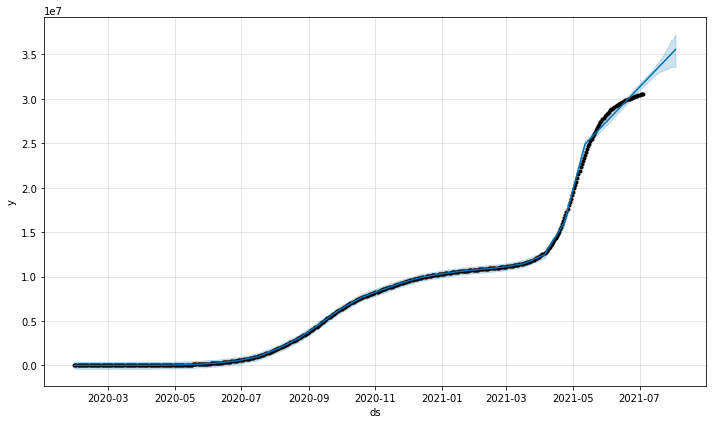

In [ ]:
model.plot(pred_ind_tc)

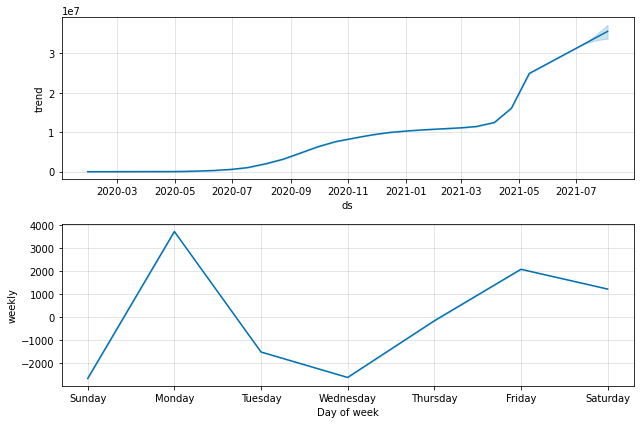

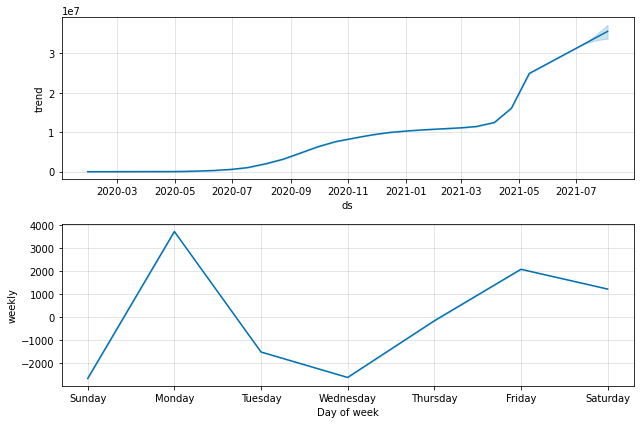

In [ ]:
model.plot_components(pred_ind_tc)

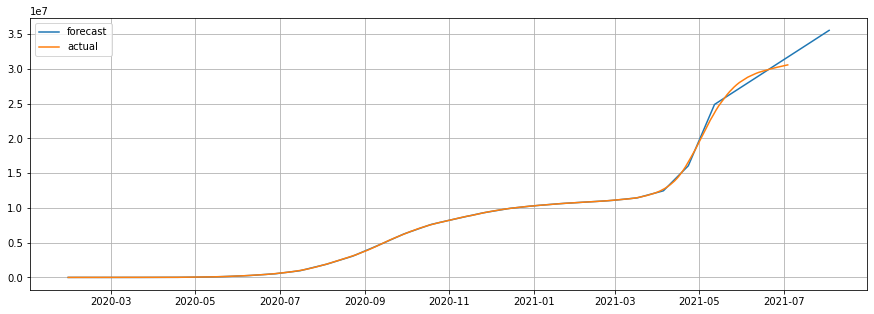

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_ind_tc['ds'],pred_ind_tc['yhat'])
plt.plot(df_ind_tc['ds'],df_ind_tc['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(model, initial='400 days', period='30 days', horizon = '120 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-06 00:00:00 and 2021-03-06 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
104 116 days  3.088020e+14  1.757276e+07  ...  0.582780  0.582881       0.0
105 117 days  3.100549e+14  1.760838e+07  ...  0.583033  0.583094       0.0
106 118 days  3.112792e+14  1.764311e+07  ...  0.583271  0.583310       0.0
107 119 days  3.124907e+14  1.767741e+07  ...  0.583494  0.583530       0.0
108 120 days  3.136714e+14  1.771077e+07  ...  0.583703  0.583752       0.0

[5 rows x 7 columns]

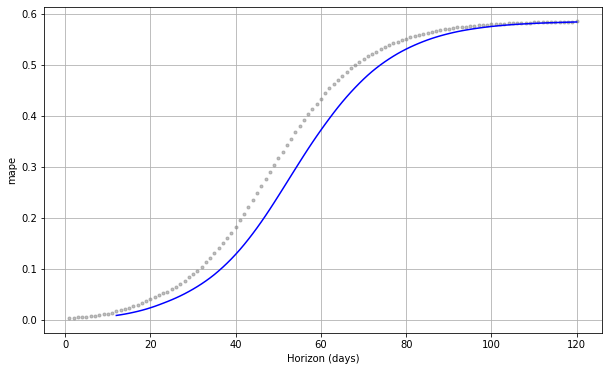

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
df_ind_tv = df_n.query("location=='India'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)

In [ ]:
df_ind_tv.head()

ds   y
41447 2020-01-30 NaN
41448 2020-01-31 NaN
41449 2020-02-01 NaN
41450 2020-02-02 NaN
41451 2020-02-03 NaN

In [ ]:
df_ind_tv1 = df_ind_tv[356:]
df_ind_tv2 = df_ind_tv[:356]

In [ ]:
df_ind_tv2 = df_ind_tv[(df_ind_tv.y.index) > 41797]

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model.fit(df_ind_tv2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_ind_tv2 = model.predict(future)

In [ ]:
pred_ind_tv2.head()

ds          trend  ...  multiplicative_terms_upper           yhat
0 2021-01-15 -268634.155396  ...                         0.0  -35392.251486
1 2021-01-16  -40776.112052  ...                         0.0  466190.540017
2 2021-01-17  187081.931292  ...                         0.0 -241103.230017
3 2021-01-18  414939.974636  ...                         0.0  382584.599294
4 2021-01-19  642798.017980  ...                         0.0  606587.676474

[5 rows x 16 columns]

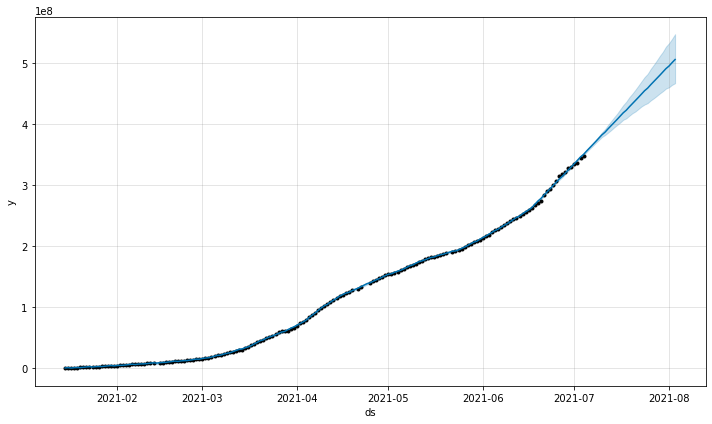

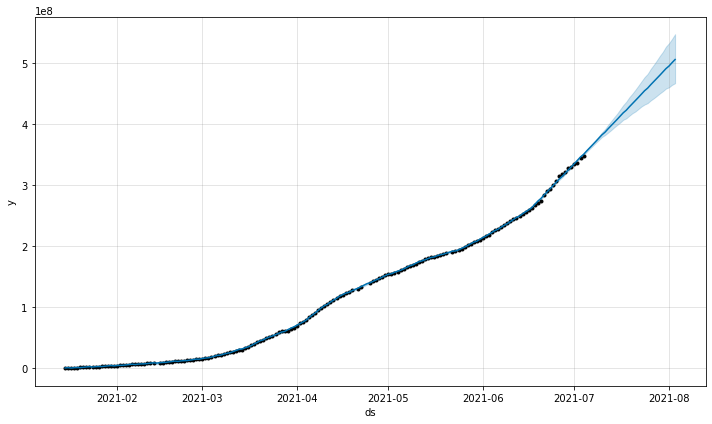

In [ ]:
model.plot(pred_ind_tv2)

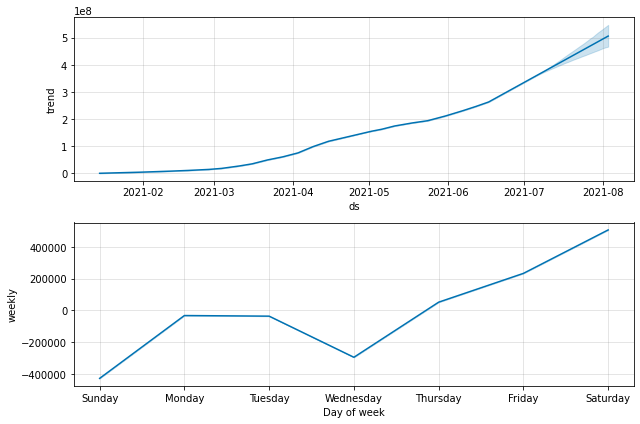

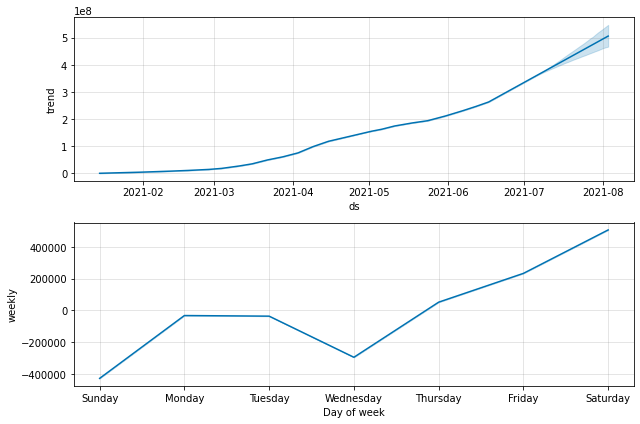

In [ ]:
model.plot_components(pred_ind_tv2)

In [ ]:
df_cv = cross_validation(model, initial='130 days' , period= '15 days' ,  horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-04 00:00:00 and 2021-06-04 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
23 26 days  2.322716e+15  4.819456e+07  ...  0.147715  0.149019       0.0
24 27 days  2.526610e+15  5.026540e+07  ...  0.152042  0.151462       0.0
25 28 days  2.552438e+15  5.052166e+07  ...  0.151571  0.150049       0.0
26 29 days  2.824047e+15  5.314177e+07  ...  0.156842  0.155644       0.0
27 30 days  3.053796e+15  5.526116e+07  ...  0.160943  0.164833       0.0

[5 rows x 7 columns]

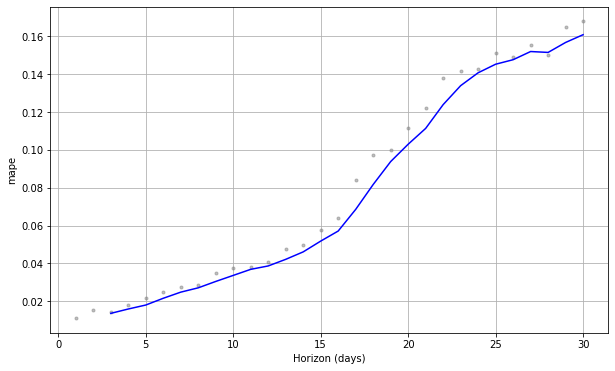

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

# USA

<Figure size 576x576 with 0 Axes>

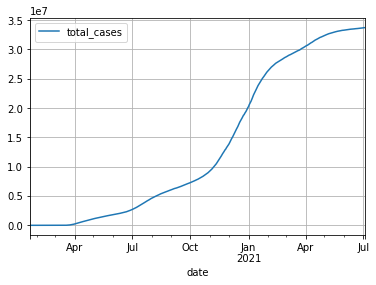

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='United States'")[['total_cases']].plot()
plt.grid()

<Figure size 576x576 with 0 Axes>

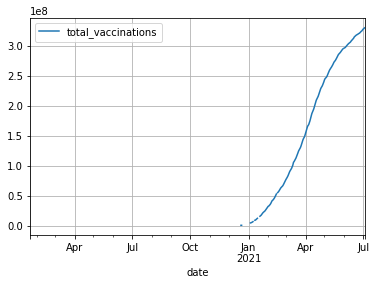

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='United States'")[['total_vaccinations']].plot()
plt.grid()

In [ ]:
df_usa_tc = df_n.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.85)
model.fit(df_usa_tc)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_usa_tc = model.predict(future)

In [ ]:
pred_usa_tc.head()

ds       trend  ...  multiplicative_terms_upper         yhat
0 2020-01-22   84.291119  ...                         0.0 -3736.377948
1 2020-01-23  120.781812  ...                         0.0   894.008198
2 2020-01-24  157.272506  ...                         0.0  7730.885705
3 2020-01-25  193.763199  ...                         0.0  9049.428607
4 2020-01-26  230.253893  ...                         0.0 -1740.746430

[5 rows x 16 columns]

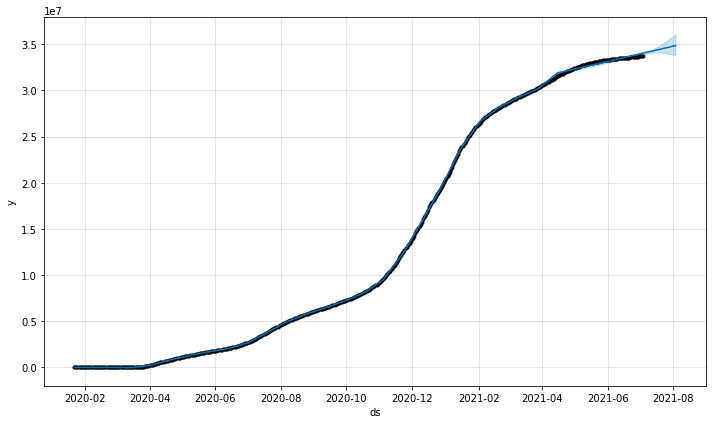

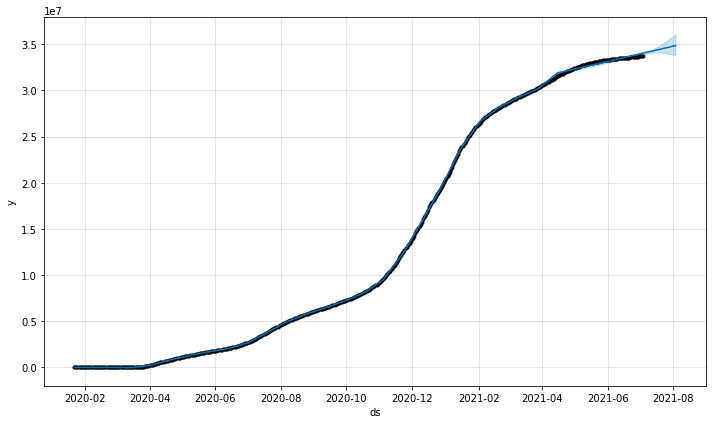

In [ ]:
model.plot(pred_usa_tc)

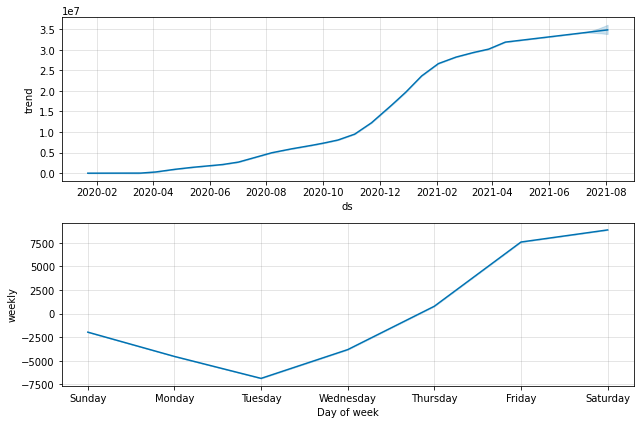

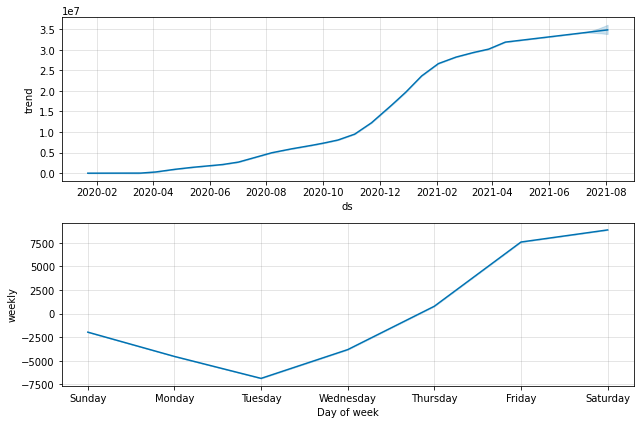

In [ ]:
model.plot_components(pred_usa_tc)

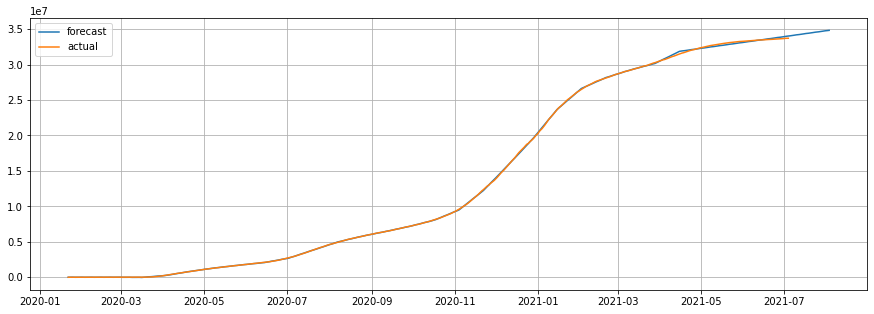

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_usa_tc['ds'],pred_usa_tc['yhat'])
plt.plot(df_usa_tc['ds'],df_usa_tc['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])

In [ ]:
df_cv = cross_validation(model, initial='400 days', period='30 days', horizon = '120 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-06 00:00:00 and 2021-03-06 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
104 116 days  1.281129e+14  1.131870e+07  ...  0.336630  0.336503       0.0
105 117 days  1.308887e+14  1.144066e+07  ...  0.340144  0.339928       0.0
106 118 days  1.336390e+14  1.156023e+07  ...  0.343562  0.343794       0.0
107 119 days  1.364502e+14  1.168119e+07  ...  0.347024  0.347369       0.0
108 120 days  1.393274e+14  1.180370e+07  ...  0.350535  0.350631       0.0

[5 rows x 7 columns]

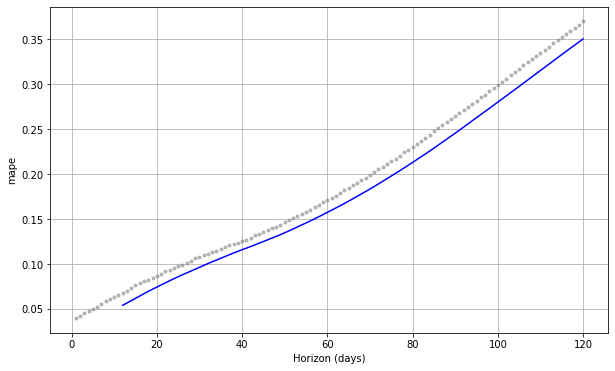

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
df_usa_tv = df_n.query("location=='United States'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)

In [ ]:
df_usa_tv1 = df_usa_tv[:348]

In [ ]:
df_usa_tv2 = df_usa_tv[(df_usa_tv.y.index) > 95281]

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.80)
model.fit(df_usa_tv2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_usa_tv = model.predict(future)

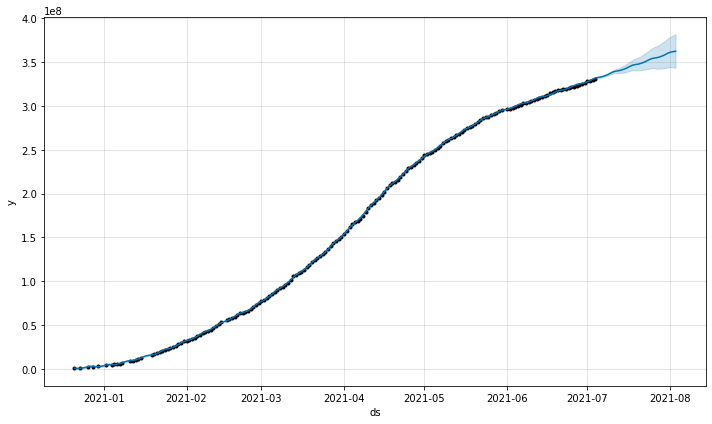

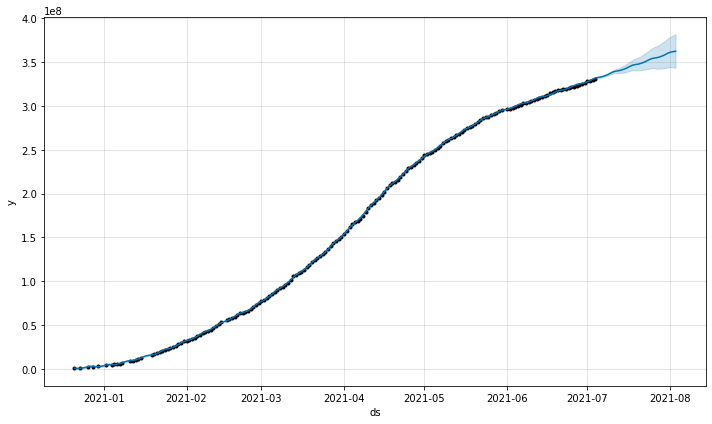

In [ ]:
model.plot(pred_usa_tv)

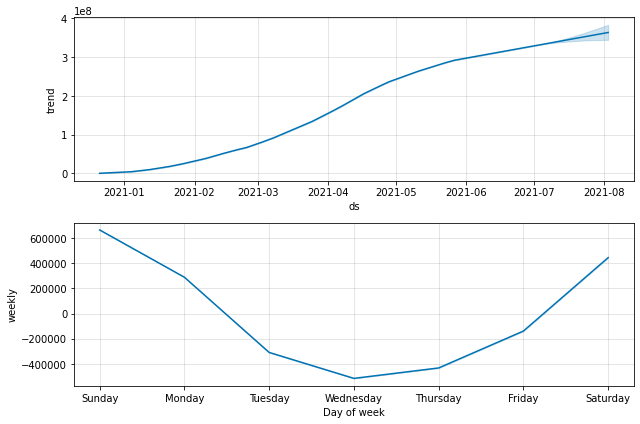

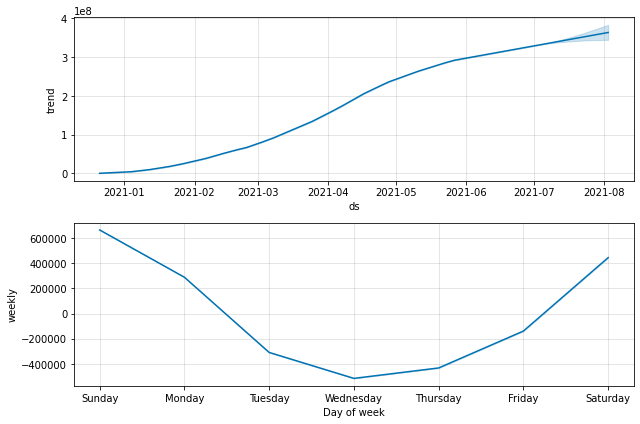

In [ ]:
model.plot_components(pred_usa_tv)

In [ ]:
df_cv = cross_validation(model, initial='150 days' , period= '15 days' ,  horizon = '40 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-05-25 00:00:00 and 2021-05-25 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
32 36 days  1.147994e+15  3.388207e+07  ...  0.104125  0.104189  0.000000
33 37 days  1.182701e+15  3.439042e+07  ...  0.105285  0.105411  0.333333
34 38 days  1.246707e+15  3.530874e+07  ...  0.107661  0.106255  0.666667
35 39 days  1.335415e+15  3.654334e+07  ...  0.111001  0.111317  1.000000
36 40 days  1.455622e+15  3.815262e+07  ...  0.115614  0.115432  0.666667

[5 rows x 7 columns]

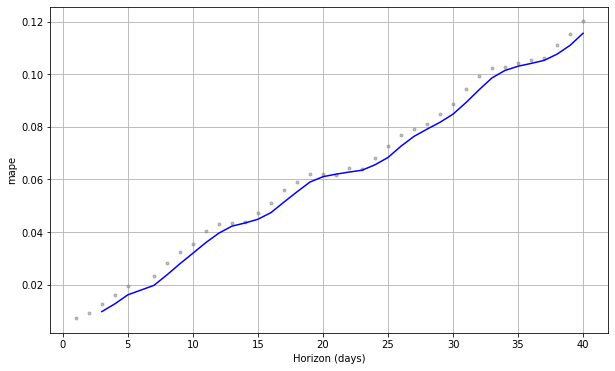

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

**THANK U**

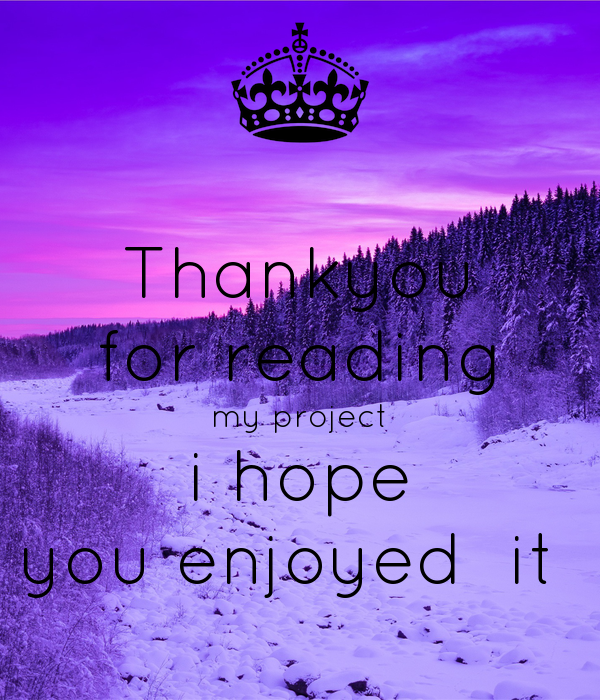